In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_excel(r"C:\Users\Aditya P J\Documents\Magang dan KKN\Magang\Proyek\data_cleanedbronze1_PGN.xlsx")
df.head()

SBU  Kode Area  No Ref  \
0  SOR I         17   28320   
1  SOR I         17   28320   
2  SOR I         17   28320   
3  SOR I         17   28320   
4  SOR I         17   28320   

                                        Account Name Sektor Industri  \
0  REKSO NASIONAL FOOD, PT (MC DONALDS R. SOEKAMT...  MAKANAN (FOOD)   
1  REKSO NASIONAL FOOD, PT (MC DONALDS R. SOEKAMT...  MAKANAN (FOOD)   
2  REKSO NASIONAL FOOD, PT (MC DONALDS R. SOEKAMT...  MAKANAN (FOOD)   
3  REKSO NASIONAL FOOD, PT (MC DONALDS R. SOEKAMT...  MAKANAN (FOOD)   
4  REKSO NASIONAL FOOD, PT (MC DONALDS R. SOEKAMT...  MAKANAN (FOOD)   

     Periode  Terukur m3  Terukur mmbtu  Batas Min  Batas Max segmentasi  
0 2022-01-01   2240.6498        79.8386       1001      10000   Bronze 1  
1 2022-02-01   1927.2066        68.6761       1001      10000   Bronze 1  
2 2022-03-01   2148.8322        76.7308       1001      10000   Bronze 1  
3 2022-04-01   2099.8126        75.0199       1001      10000   Bronze 1  
4 2022-05-01   2482.0835        88.3512       1001      10000   Bronze 1

In [3]:
total = df['Terukur m3'].sum()
print(f"Total: {total}")

Total: 75925378.4611


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24263 entries, 0 to 24262
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   SBU              24263 non-null  object        
 1   Kode Area        24263 non-null  int64         
 2   No Ref           24263 non-null  int64         
 3   Account Name     24263 non-null  object        
 4   Sektor Industri  24263 non-null  object        
 5   Periode          24263 non-null  datetime64[ns]
 6   Terukur m3       24263 non-null  float64       
 7   Terukur mmbtu    24263 non-null  float64       
 8   Batas Min        24263 non-null  int64         
 9   Batas Max        24263 non-null  int64         
 10  segmentasi       24263 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(4), object(4)
memory usage: 2.0+ MB


In [5]:
df.isnull().sum()

SBU                0
Kode Area          0
No Ref             0
Account Name       0
Sektor Industri    0
Periode            0
Terukur m3         0
Terukur mmbtu      0
Batas Min          0
Batas Max          0
segmentasi         0
dtype: int64

In [6]:
df[['Terukur m3', 'Terukur mmbtu', 'Batas Min', 'Batas Max']].describe()

Terukur m3  Terukur mmbtu     Batas Min     Batas Max
count  24263.000000   24263.000000  24263.000000  24263.000000
mean    3129.265897     116.831600   1001.047150  10463.231876
std     2561.932508      96.095576      5.211313   1601.830005
min      500.210500      17.977000   1000.000000   6301.000000
25%     1390.568500      51.663100   1001.000000  10000.000000
50%     2258.339100      83.726300   1001.000000  10000.000000
75%     3979.750000     148.397800   1001.000000  10000.000000
max    16981.314500     772.378600   1575.000000  16000.000000

In [7]:
df[['Terukur m3']].describe()

Terukur m3
count  24263.000000
mean    3129.265897
std     2561.932508
min      500.210500
25%     1390.568500
50%     2258.339100
75%     3979.750000
max    16981.314500

### 📊 Chart EDA (histplot kde, BOX Plot, Periode)

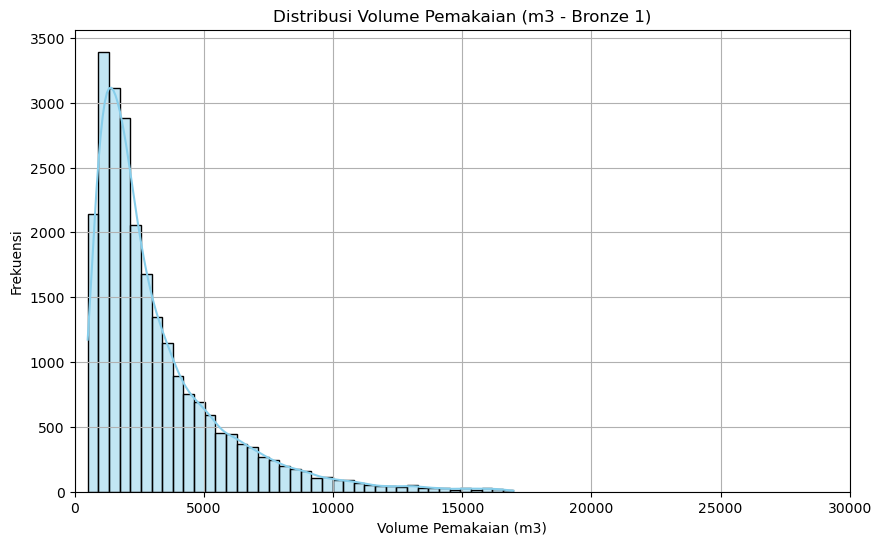

In [9]:
#Distribusi Volume Pemakaian

plt.figure(figsize=(10,6))
sns.histplot(df['Terukur m3'], kde=True, bins=40, color='skyblue')
plt.title('Distribusi Volume Pemakaian (m3 - Bronze 1)')
plt.xlabel('Volume Pemakaian (m3)')
plt.ylabel('Frekuensi')
plt.grid(True)
plt.xlim(0, 30000)
plt.show()

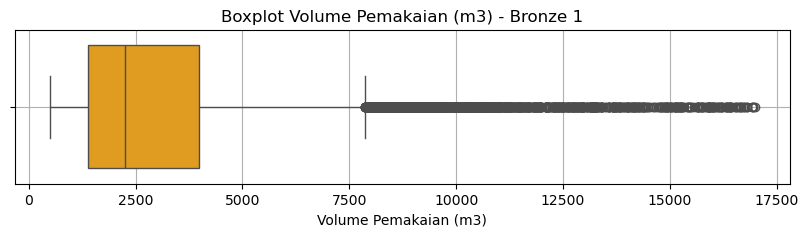

In [10]:
plt.figure(figsize=(10, 2))
sns.boxplot(x=df['Terukur m3'], color='orange')
plt.title('Boxplot Volume Pemakaian (m3) - Bronze 1')
plt.xlabel('Volume Pemakaian (m3)')
plt.grid(True)
plt.show()


In [11]:
skew_val = df['Terukur m3'].skew()
print(f'Skewness: {skew_val:.2f}')

print(df['Terukur m3'].describe())

Skewness: 1.97
count    24263.000000
mean      3129.265897
std       2561.932508
min        500.210500
25%       1390.568500
50%       2258.339100
75%       3979.750000
max      16981.314500
Name: Terukur m3, dtype: float64


<function matplotlib.pyplot.show(close=None, block=None)>

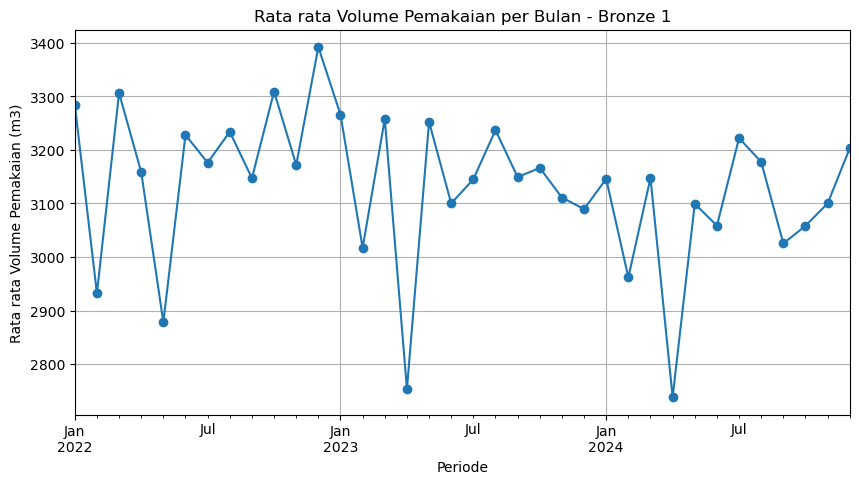

In [12]:
df['Periode'] = pd.to_datetime(df['Periode'])
monthly_avg = df.groupby(df['Periode'].dt.to_period('M'))['Terukur m3'].mean()

monthly_avg.plot(kind='line', marker='o', figsize=(10,5))
plt.title('Rata rata Volume Pemakaian per Bulan - Bronze 1')
plt.xlabel('Periode')
plt.ylabel('Rata rata Volume Pemakaian (m3)')
plt.grid(True)
plt.show

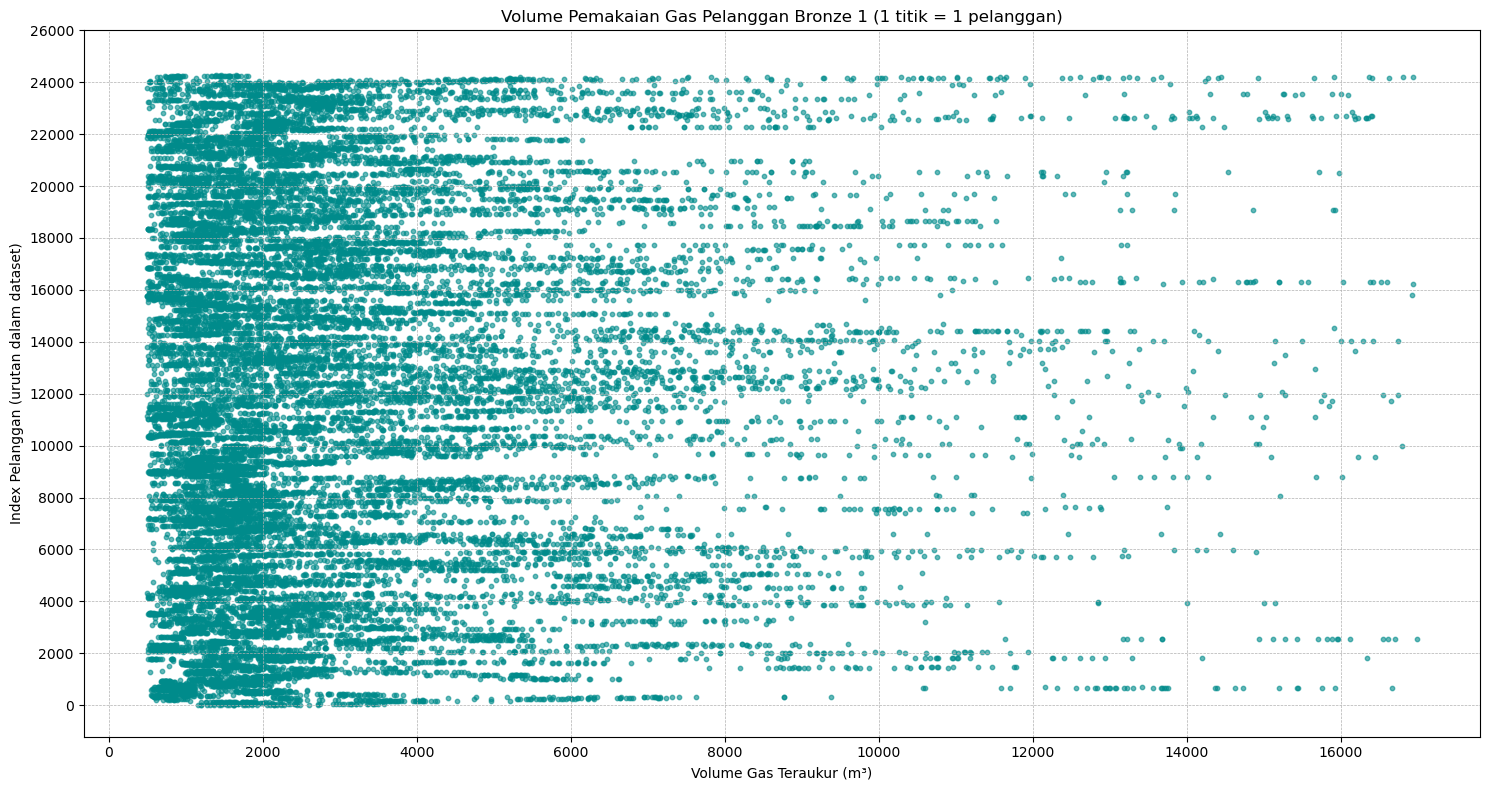

In [13]:
df = df.reset_index(drop=True)

# Scatter plot aktual (1 titik = 1 pelanggan)
plt.figure(figsize=(15, 8))
plt.scatter(df['Terukur m3'], df.index, color='darkcyan', alpha=0.6, s=10)
plt.title('Volume Pemakaian Gas Pelanggan Bronze 1 (1 titik = 1 pelanggan)')
plt.xlabel('Volume Gas Teraukur (m³)')
plt.ylabel('Index Pelanggan (urutan dalam dataset)')
plt.grid(True, linestyle='--', linewidth=0.5)
max_x = df['Terukur m3'].max()
max_y = df.index.max()
plt.xticks(np.arange(0, max_x, 2000))
plt.yticks(np.arange(0, max_y + 2000, 2000))
plt.tight_layout()
plt.show()

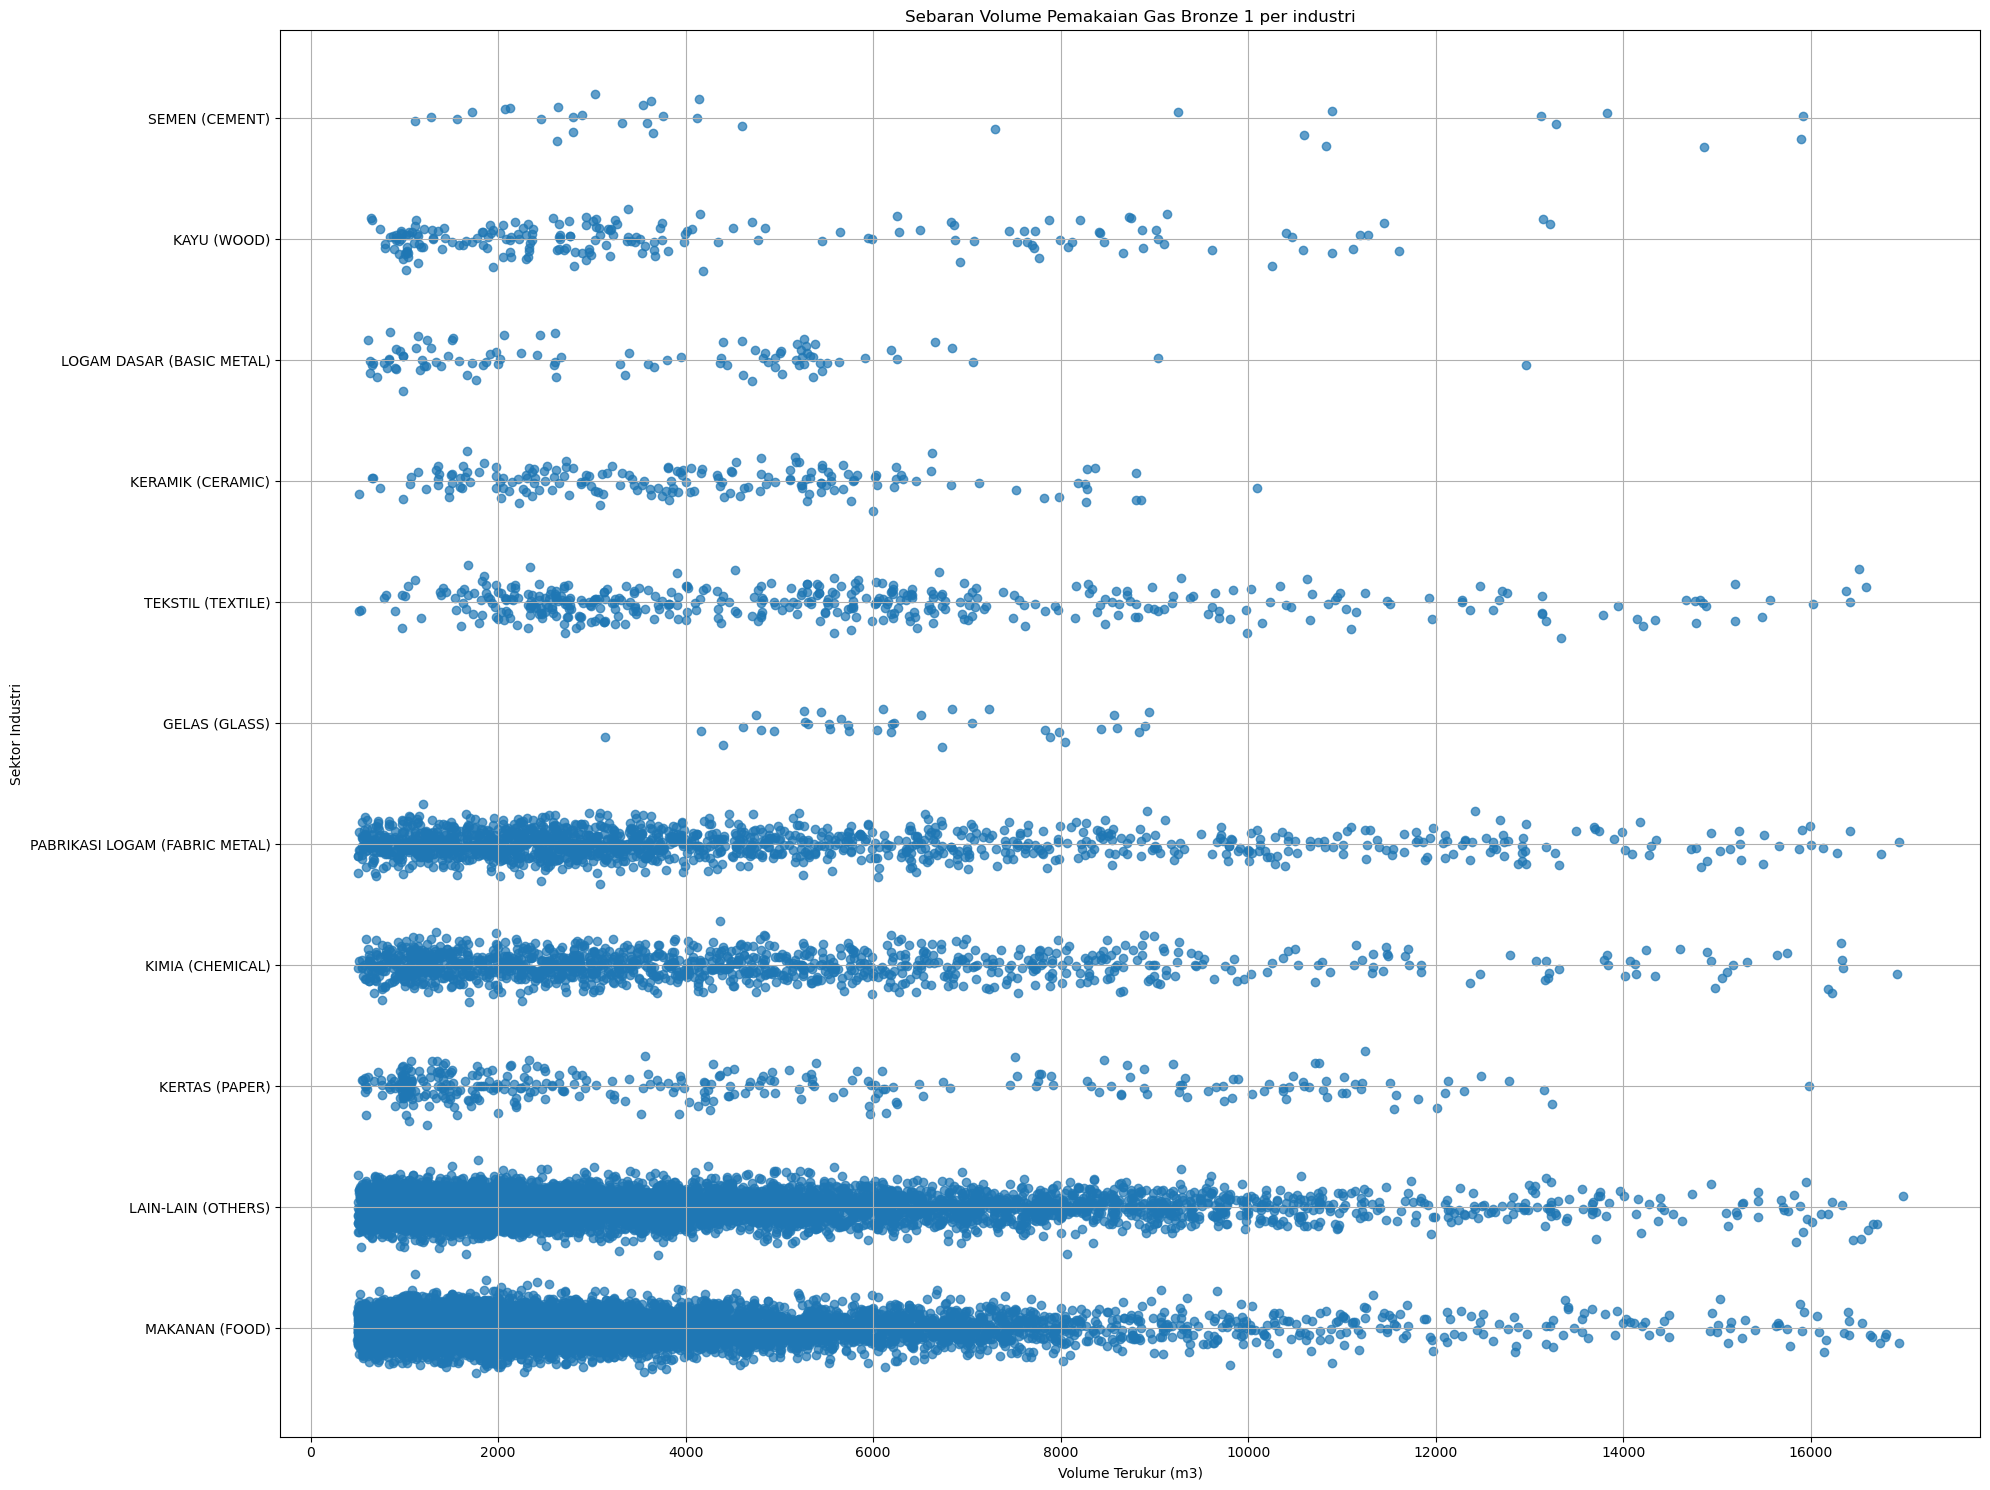

In [14]:
#mapping
sector_mapping = {sector:i for i, sector in enumerate(df['Sektor Industri'].unique())}
df['Y_code'] = df['Sektor Industri'].map(sector_mapping)

#efek jitter
np.random.seed(42)
df['Y_jittered'] = df['Y_code'] + np.random.normal(0, 0.1, size=len(df))

plt.figure(figsize=(20, 15))
plt.scatter(df['Terukur m3'], df['Y_jittered'], alpha=0.7)
sorted_sectors = sorted(sector_mapping.items(), key = lambda x: x[1])
max_x = df['Terukur m3'].max()
plt.xticks(np.arange(0, max_x, 2000))
plt.yticks(
    ticks=[code for sector, code in sorted_sectors],
    labels=[sector for sector, code in sorted_sectors]
)
plt.xlabel('Volume Terukur (m3)')
plt.ylabel('Sektor Industri')
plt.title('Sebaran Volume Pemakaian Gas Bronze 1 per industri')
plt.grid(True)
plt.tight_layout()
plt.show()

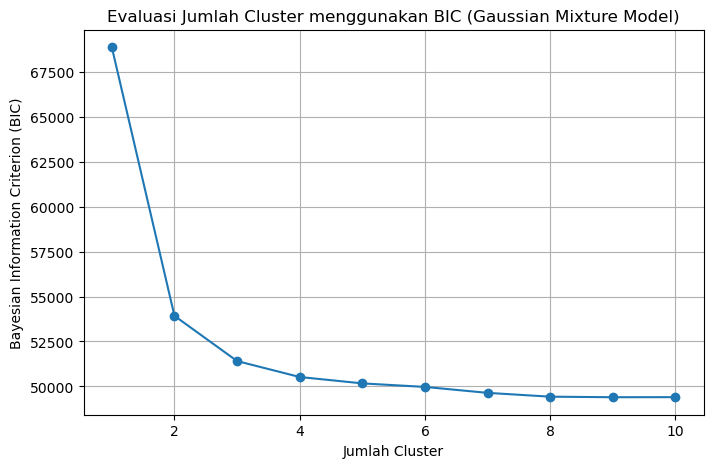

In [15]:
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Data awal
x = df[["Terukur m3"]].copy()

# Standarisasi
scaler = StandardScaler()
scaled = scaler.fit_transform(x)

# Inisialisasi list untuk BIC
bic_scores = []

# Uji jumlah cluster dari 1 sampai 10
for k in range(1, 11):
    gmm = GaussianMixture(n_components=k, random_state=42)
    gmm.fit(scaled)
    bic = gmm.bic(scaled)
    bic_scores.append(bic)

# Visualisasi
plt.figure(figsize=(8,5))
plt.plot(range(1,11), bic_scores, marker='o')
plt.xlabel("Jumlah Cluster")
plt.ylabel("Bayesian Information Criterion (BIC)")
plt.title("Evaluasi Jumlah Cluster menggunakan BIC (Gaussian Mixture Model)")
plt.grid(True)
plt.show()


## 📈 Elbow Method

In [17]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

x = df[["Terukur m3"]].copy()

scaler = StandardScaler()
scaled = scaler.fit_transform(x)

inertia = []
for k in range(1, 10):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(scaled)
    inertia.append(km.inertia_)

D:\Terminal\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Terminal\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Terminal\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Terminal\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Terminal\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` w

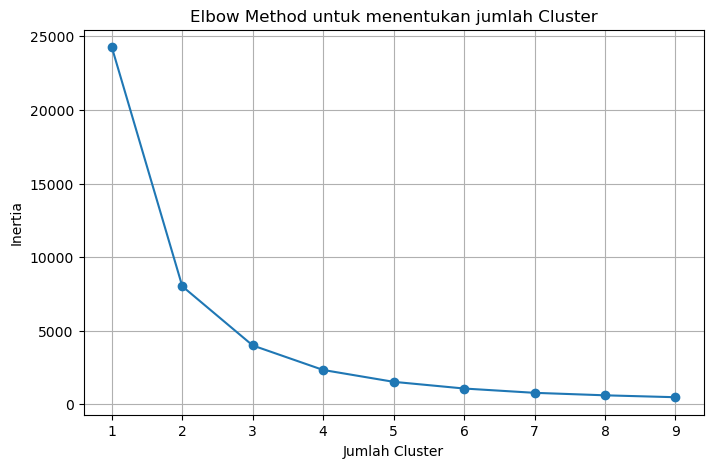

In [18]:
plt.figure(figsize=(8,5))
plt.plot(range(1,10), inertia, marker='o')
plt.xlabel("Jumlah Cluster")
plt.ylabel("Inertia")
plt.title('Elbow Method untuk menentukan jumlah Cluster')
plt.grid(True)
plt.show()

## 📈 Silhouette Method

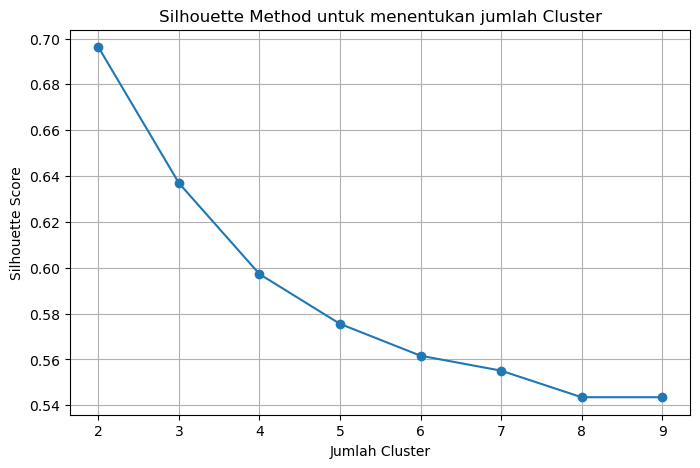

In [20]:
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

# Ambil fitur
x = df[["Terukur m3"]].copy()

# Scaling
scaler = StandardScaler()
scaled = scaler.fit_transform(x)

# Hitung Silhouette Score untuk berbagai jumlah cluster
silhouette_scores = []

range_n_clusters = range(2, 10)  
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init='auto')
    cluster_labels = kmeans.fit_predict(scaled)
    silhouette_avg = silhouette_score(scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot
plt.figure(figsize=(8,5))
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.xlabel("Jumlah Cluster")
plt.ylabel("Silhouette Score")
plt.title('Silhouette Method untuk menentukan jumlah Cluster')
plt.grid(True)
plt.show()


## K Means

### K-Means 2 cluster

In [23]:
meank2_perusahaan = df.groupby('Account Name')['Terukur m3'].mean().reset_index()


# Standardisasi data log-transform
scaler = StandardScaler()
meank2_scaled = scaler.fit_transform(meank2_perusahaan[['Terukur m3']])

# Clustering dengan K-Means
k2means = KMeans(n_clusters=2, random_state=42, n_init='auto')
meank2_perusahaan['K2mean_Cluster'] = k2means.fit_predict(meank2_scaled)

D:\Terminal\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


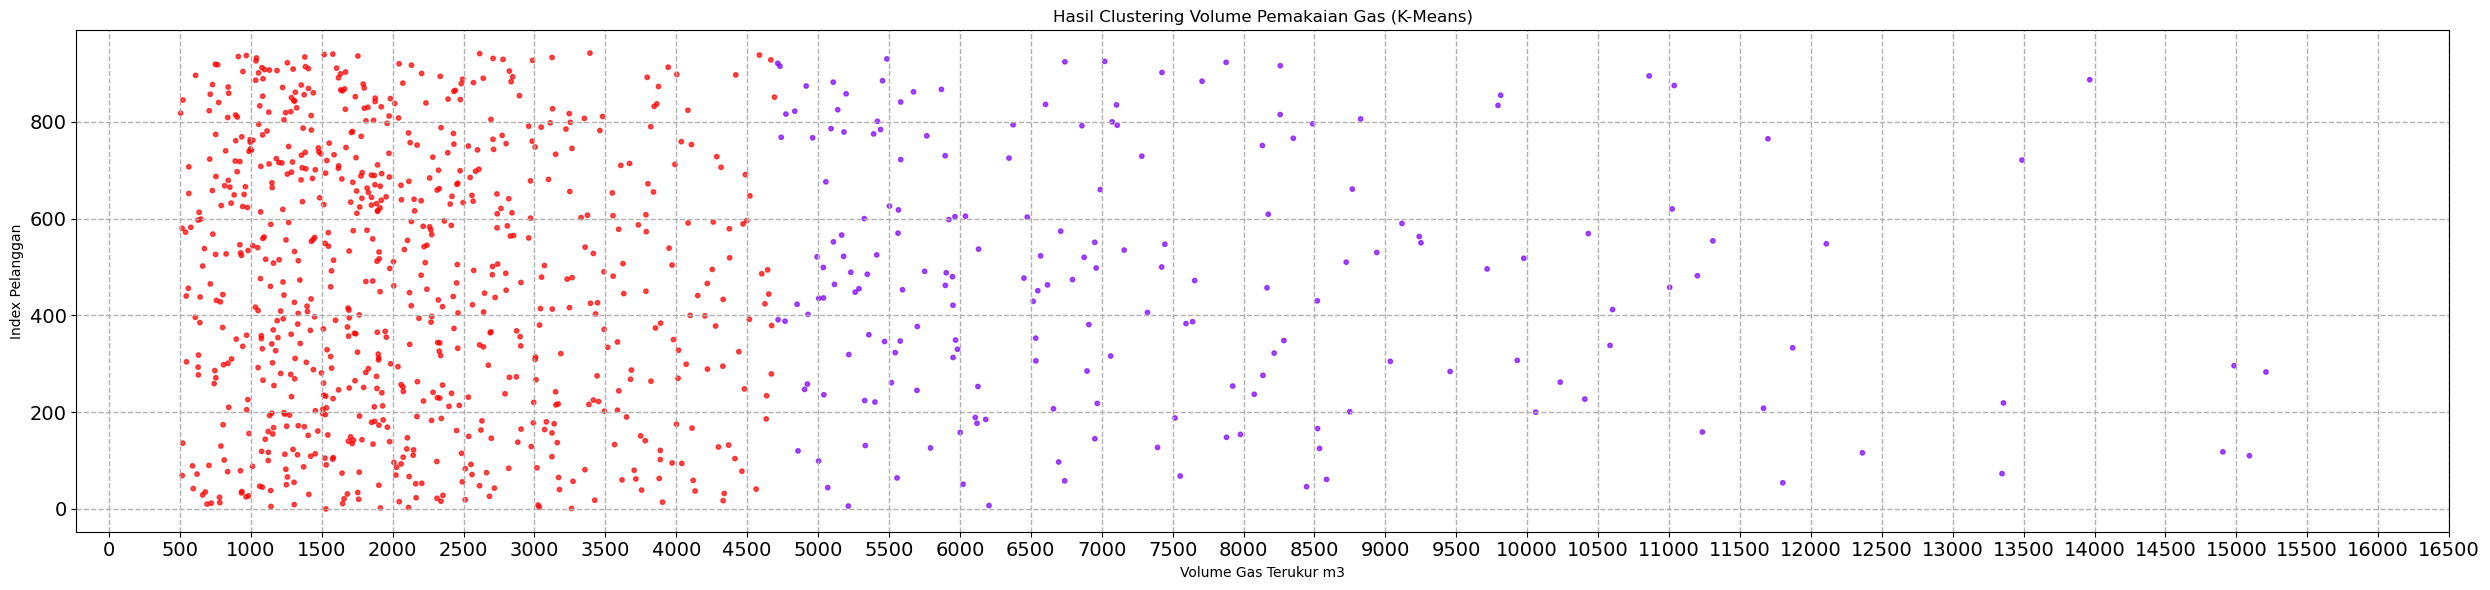

In [24]:
plt.figure(figsize=(25, 6))
plt.scatter(meank2_perusahaan['Terukur m3'], meank2_perusahaan.index, c=meank2_perusahaan['K2mean_Cluster'], cmap='rainbow', s=10, alpha=0.7)
plt.title('Hasil Clustering Volume Pemakaian Gas (K-Means)')
plt.xlabel('Volume Gas Terukur m3')
plt.ylabel('Index Pelanggan')
max_x = df['Terukur m3'].max()
plt.xticks(np.arange(0, max_x, 500), fontsize = 14)
plt.yticks(fontsize = 14)
plt.grid(True, linestyle='--', linewidth=1)
plt.tight_layout()
plt.show()

In [25]:
cluster_stats = meank2_perusahaan.groupby('K2mean_Cluster')['Terukur m3'].describe()

print('\nDeskripsi Statistik Volume Pemakaian per Cluster :')
print(cluster_stats.to_markdown(tablefmt='grid', floatfmt='.2f'))


Deskripsi Statistik Volume Pemakaian per Cluster :
+------------------+---------+---------+---------+---------+---------+---------+---------+----------+
|   K2mean_Cluster |   count |    mean |     std |     min |     25% |     50% |     75% |      max |
+==================+=========+=========+=========+=========+=========+=========+=========+==========+
|                0 |  191.00 | 7316.42 | 2395.67 | 4715.68 | 5476.82 | 6617.46 | 8397.34 | 15208.95 |
+------------------+---------+---------+---------+---------+---------+---------+---------+----------+
|                1 |  752.00 | 2110.24 | 1053.45 |  505.46 | 1264.71 | 1894.71 | 2798.53 |  4692.50 |
+------------------+---------+---------+---------+---------+---------+---------+---------+----------+


In [26]:
kmeans = KMeans(n_clusters=2, random_state=42, n_init='auto')
df['K2_Cluster'] = kmeans.fit_predict(scaled)

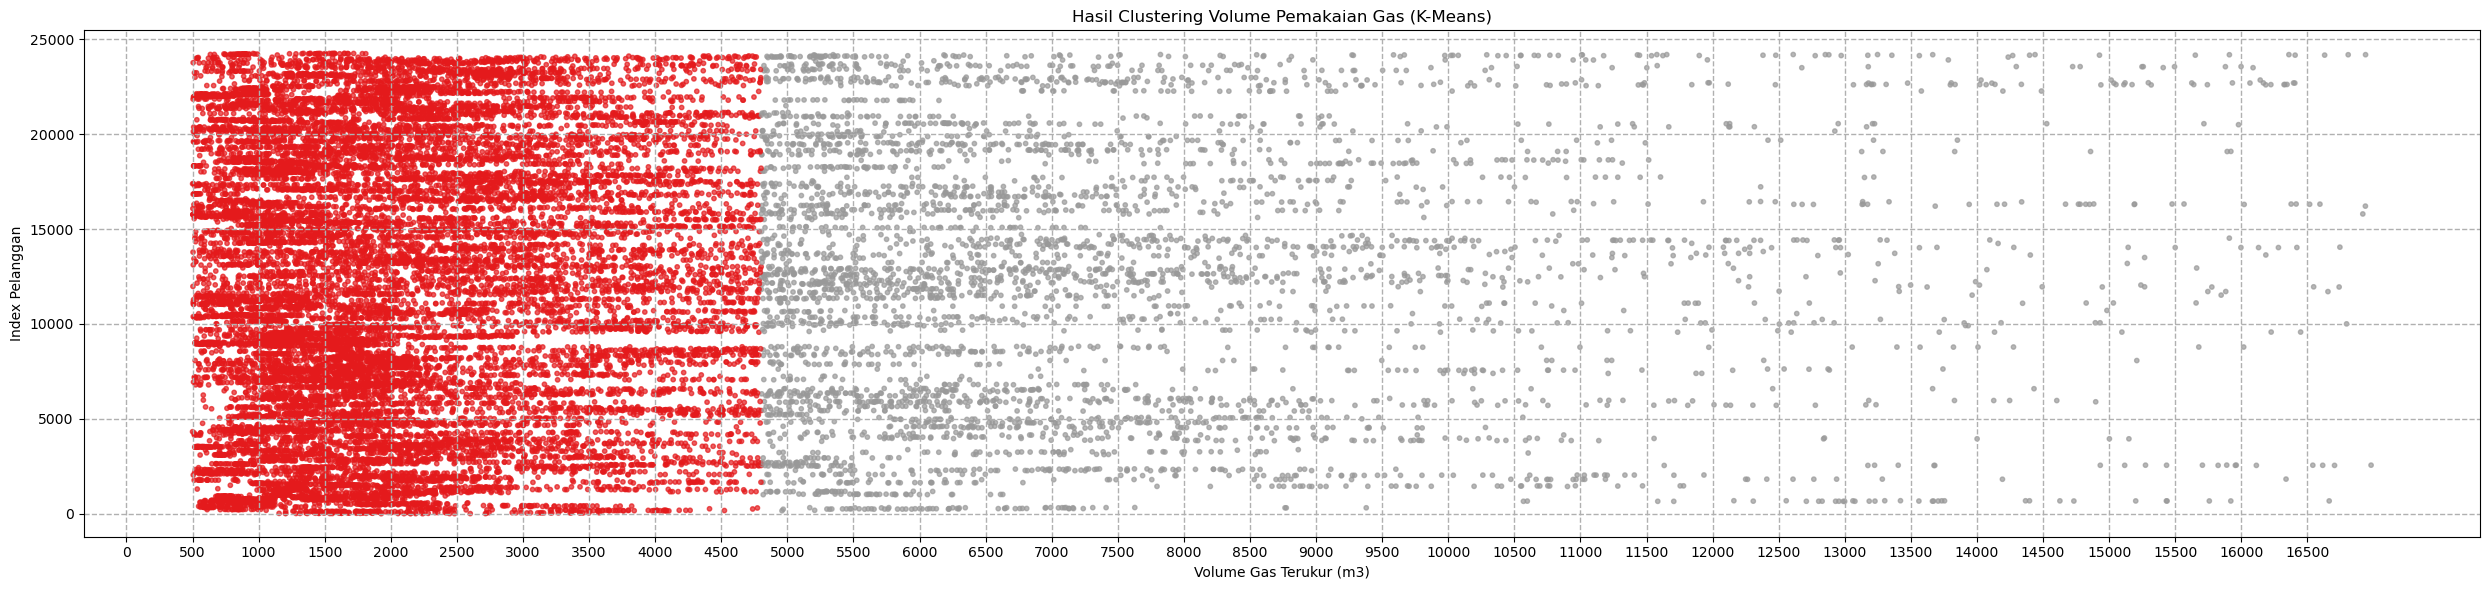

In [27]:
plt.figure(figsize=(25, 6))
plt.scatter(df['Terukur m3'], df.index, c=df['K2_Cluster'], cmap='Set1', s=10, alpha=0.7)
plt.title('Hasil Clustering Volume Pemakaian Gas (K-Means)')
plt.xlabel('Volume Gas Terukur (m3)')
plt.ylabel('Index Pelanggan')
max_x = df['Terukur m3'].max()
plt.xticks(np.arange(0, max_x, 500))
plt.grid(True, linestyle='--', linewidth=1)
plt.tight_layout()
plt.show()

In [28]:
cluster_stats = df.groupby('K2_Cluster')['Terukur m3'].describe()

print('\nDeskripsi Statistik Volume Pemakaian per Cluster :')
print(cluster_stats.to_markdown(tablefmt='grid', floatfmt='.2f'))


Deskripsi Statistik Volume Pemakaian per Cluster :
+--------------+----------+---------+---------+---------+---------+---------+---------+----------+
|   K2_Cluster |    count |    mean |     std |     min |     25% |     50% |     75% |      max |
+==============+==========+=========+=========+=========+=========+=========+=========+==========+
|            0 | 19721.00 | 2123.14 | 1076.69 |  500.21 | 1248.58 | 1902.37 | 2827.91 |  4801.77 |
+--------------+----------+---------+---------+---------+---------+---------+---------+----------+
|            1 |  4542.00 | 7497.77 | 2559.18 | 4802.84 | 5568.29 | 6723.71 | 8575.11 | 16981.31 |
+--------------+----------+---------+---------+---------+---------+---------+---------+----------+


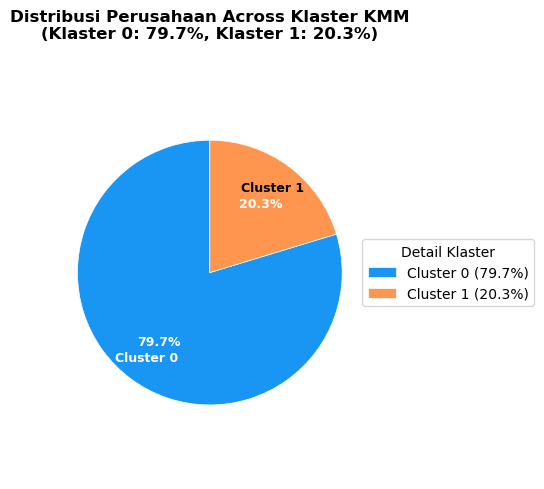

In [29]:
# Prepare data
counts = pd.Series({0: 79.7, 1: 20.3}) 
labels = [f'Cluster {i}' for i in counts.index]
colors = plt.cm.rainbow([0.2, 0.8])  # Menggunakan nilai yang berbeda untuk warna berbeda

# Create figure with constrained layout
plt.figure(figsize=(5, 5), dpi=100, facecolor='white')
plt.rcParams['font.size'] = 10

# Create pie chart with improved parameters
wedges, texts, autotexts = plt.pie(
    counts,
    labels=labels,
    autopct='%1.1f%%',  # Menampilkan semua persentase
    startangle=90,
    colors=colors,
    wedgeprops={'linewidth': 0.5, 'edgecolor': 'white'},
    pctdistance=0.65,
    labeldistance=0.8,
    textprops={
        'color': 'white',
        'weight': 'bold',
        'fontsize': 9
    }
)

# Improve label positioning and styling
for text, wedge in zip(texts, wedges):
    text.set_horizontalalignment('center')
    text.set_verticalalignment('center')
    r, g, b, _ = wedge.get_facecolor()
    text.set_color('black' if (r*0.299 + g*0.587 + b*0.114) > 0.6 else 'white')

# Add title with padding
plt.title(
    'Distribusi Perusahaan Across Klaster KMM\n(Klaster 0: 79.7%, Klaster 1: 20.3%)',
    pad=20,
    fontweight='bold',
    fontsize=12
)

# Add legend
plt.legend(
    wedges,
    [f'{l} ({c}%)' for l, c in zip(labels, counts)],
    title="Detail Klaster",
    loc="center left",
    bbox_to_anchor=(1, 0.5)
)

plt.axis('equal')
plt.tight_layout()
plt.show()

### K-Means 3 Cluster

In [31]:
meank3_perusahaan = df.groupby('Account Name')['Terukur m3'].mean().reset_index()

scaler = StandardScaler()
meank3_scaled = scaler.fit_transform(meank3_perusahaan[['Terukur m3']])

k3means = KMeans(n_clusters=3, random_state=42, n_init='auto')
meank3_perusahaan['K3mean_Cluster'] = k3means.fit_predict(meank3_scaled)

D:\Terminal\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


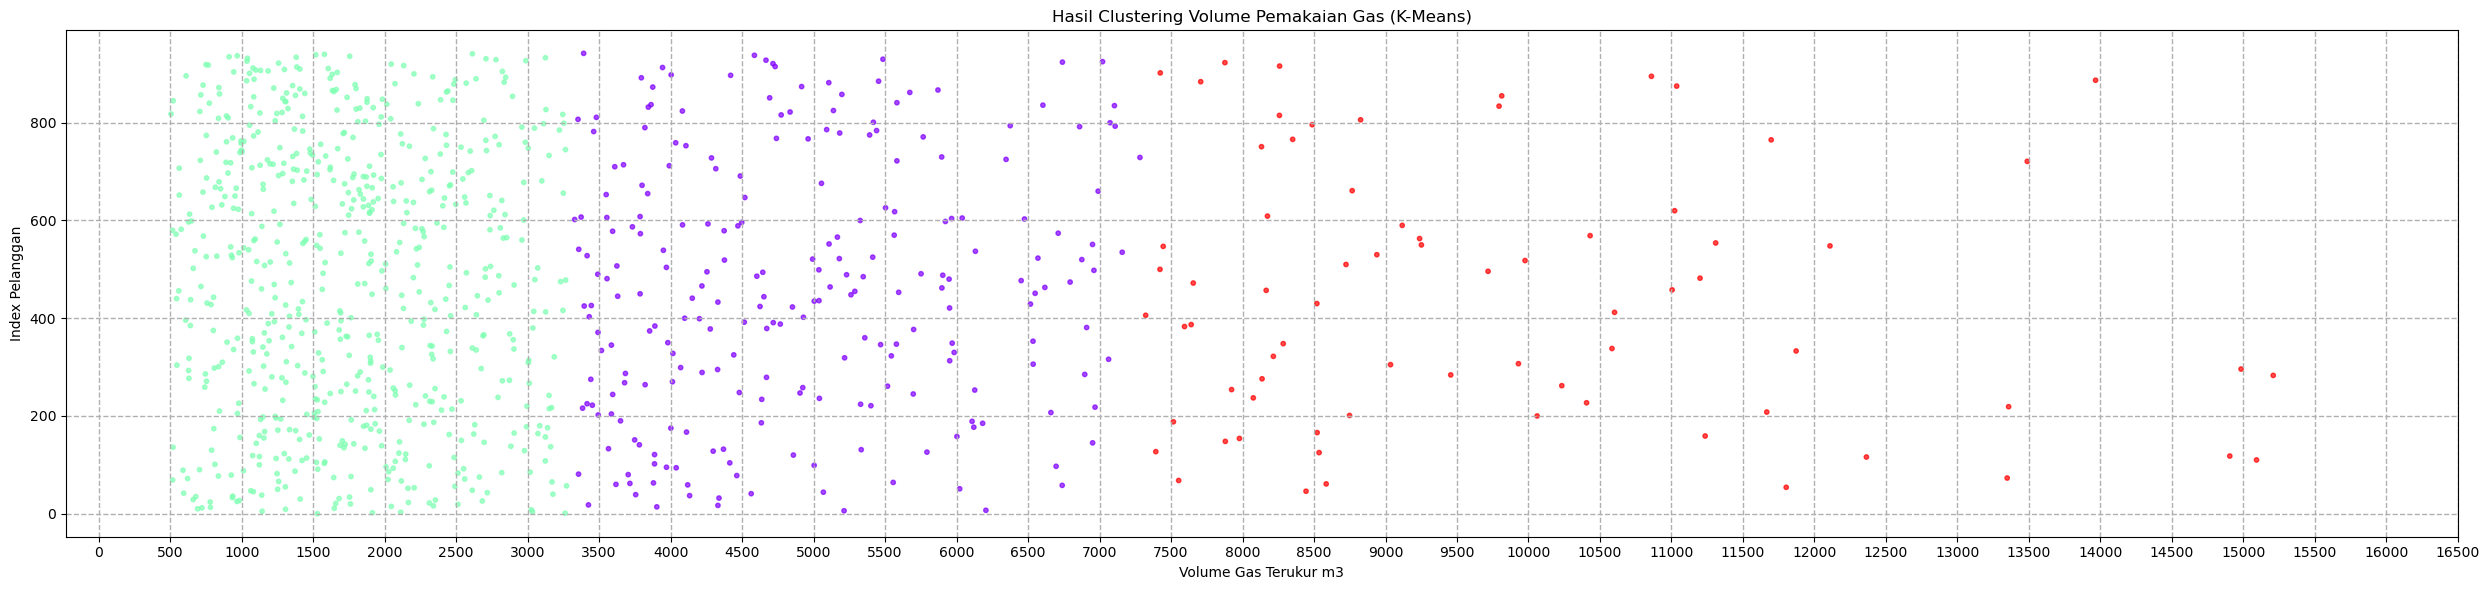

In [32]:
plt.figure(figsize=(25, 6))
plt.scatter(meank3_perusahaan['Terukur m3'], meank3_perusahaan.index, c=meank3_perusahaan['K3mean_Cluster'], cmap='rainbow', s=10, alpha=0.7)
plt.title('Hasil Clustering Volume Pemakaian Gas (K-Means)')
plt.xlabel('Volume Gas Terukur m3')
plt.ylabel('Index Pelanggan')
max_x = df['Terukur m3'].max()
plt.xticks(np.arange(0, max_x, 500))
plt.grid(True, linestyle='--', linewidth=1)
plt.tight_layout()
plt.show()

In [33]:
cluster_stats = meank3_perusahaan.groupby('K3mean_Cluster')['Terukur m3'].describe()

print('\nDeskripsi Statistik Volume Pemakaian per Cluster :')
print(cluster_stats.to_markdown(tablefmt='grid', floatfmt='.2f'))


Deskripsi Statistik Volume Pemakaian per Cluster :
+------------------+---------+---------+---------+---------+---------+---------+----------+----------+
|   K3mean_Cluster |   count |    mean |     std |     min |     25% |     50% |      75% |      max |
+==================+=========+=========+=========+=========+=========+=========+==========+==========+
|                0 |  237.00 | 4878.40 | 1092.29 | 3328.75 | 3903.18 | 4692.50 |  5595.00 |  7282.49 |
+------------------+---------+---------+---------+---------+---------+---------+----------+----------+
|                1 |  633.00 | 1762.24 |  722.69 |  505.46 | 1159.86 | 1704.18 |  2323.64 |  3272.08 |
+------------------+---------+---------+---------+---------+---------+---------+----------+----------+
|                2 |   73.00 | 9762.45 | 2114.13 | 7322.63 | 8165.44 | 9034.99 | 11022.34 | 15208.95 |
+------------------+---------+---------+---------+---------+---------+---------+----------+----------+


In [34]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init='auto')
df['k3_Cluster'] = kmeans.fit_predict(scaled)

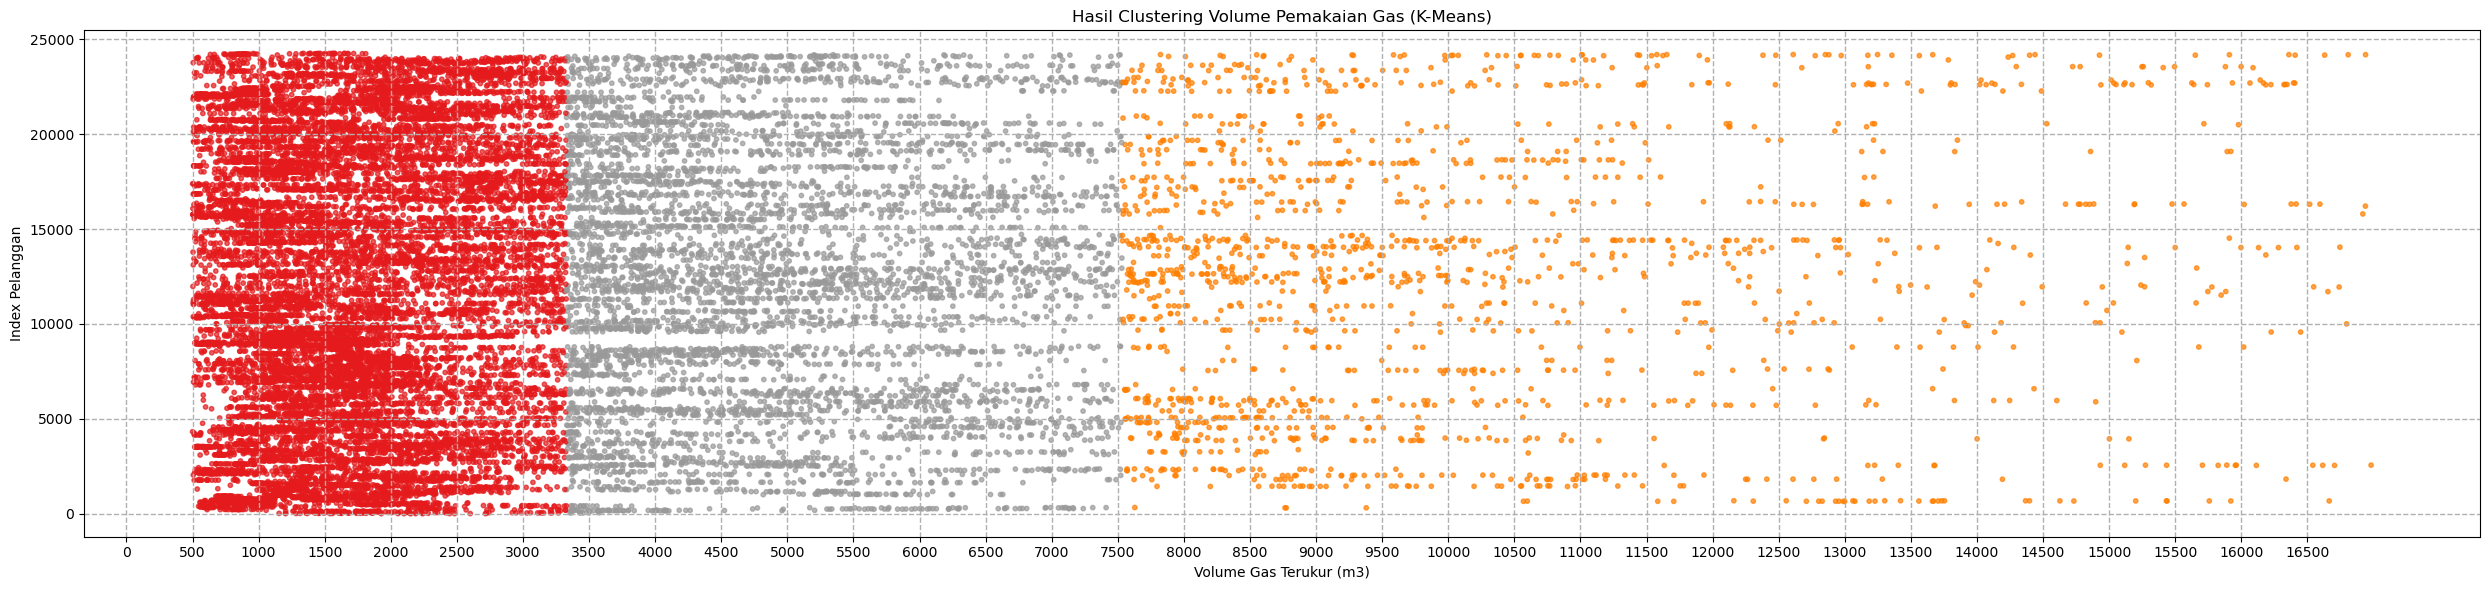

In [35]:
plt.figure(figsize=(25, 6))
plt.scatter(df['Terukur m3'], df.index, c=df['k3_Cluster'], cmap='Set1', s=10, alpha=0.7)
plt.title('Hasil Clustering Volume Pemakaian Gas (K-Means)')
plt.xlabel('Volume Gas Terukur (m3)')
plt.ylabel('Index Pelanggan')
max_x = df['Terukur m3'].max()
plt.xticks(np.arange(0, max_x, 500))
plt.grid(True, linestyle='--', linewidth=1)
plt.tight_layout()
plt.show()

In [36]:
cluster_stats = df.groupby('k3_Cluster')['Terukur m3'].describe()

print('\nDeskripsi Statistik Volume Pemakaian per Cluster :')
print(cluster_stats.to_markdown(tablefmt='grid', floatfmt='.2f'))


Deskripsi Statistik Volume Pemakaian per Cluster :
+--------------+----------+----------+---------+---------+---------+---------+----------+----------+
|   k3_Cluster |    count |     mean |     std |     min |     25% |     50% |      75% |      max |
+==============+==========+==========+=========+=========+=========+=========+==========+==========+
|            0 | 16449.00 |  1753.85 |  729.41 |  500.21 | 1151.97 | 1676.61 |  2295.36 |  3327.87 |
+--------------+----------+----------+---------+---------+---------+---------+----------+----------+
|            1 |  1668.00 | 10168.58 | 2350.63 | 7535.01 | 8311.87 | 9388.23 | 11382.21 | 16981.31 |
+--------------+----------+----------+---------+---------+---------+---------+----------+----------+
|            2 |  6146.00 |  4899.96 | 1158.07 | 3329.25 | 3889.04 | 4683.71 |  5767.94 |  7530.68 |
+--------------+----------+----------+---------+---------+---------+---------+----------+----------+


## Hierarchical Clustering

### Hierarchical Clustering 2 Cluster

In [39]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

mean_perusahaanhd = df.groupby('Account Name')['Terukur m3'].mean().reset_index()

x = mean_perusahaanhd[['Terukur m3']]
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Hitung linkage matrix
linked = linkage(x_scaled, method='ward')

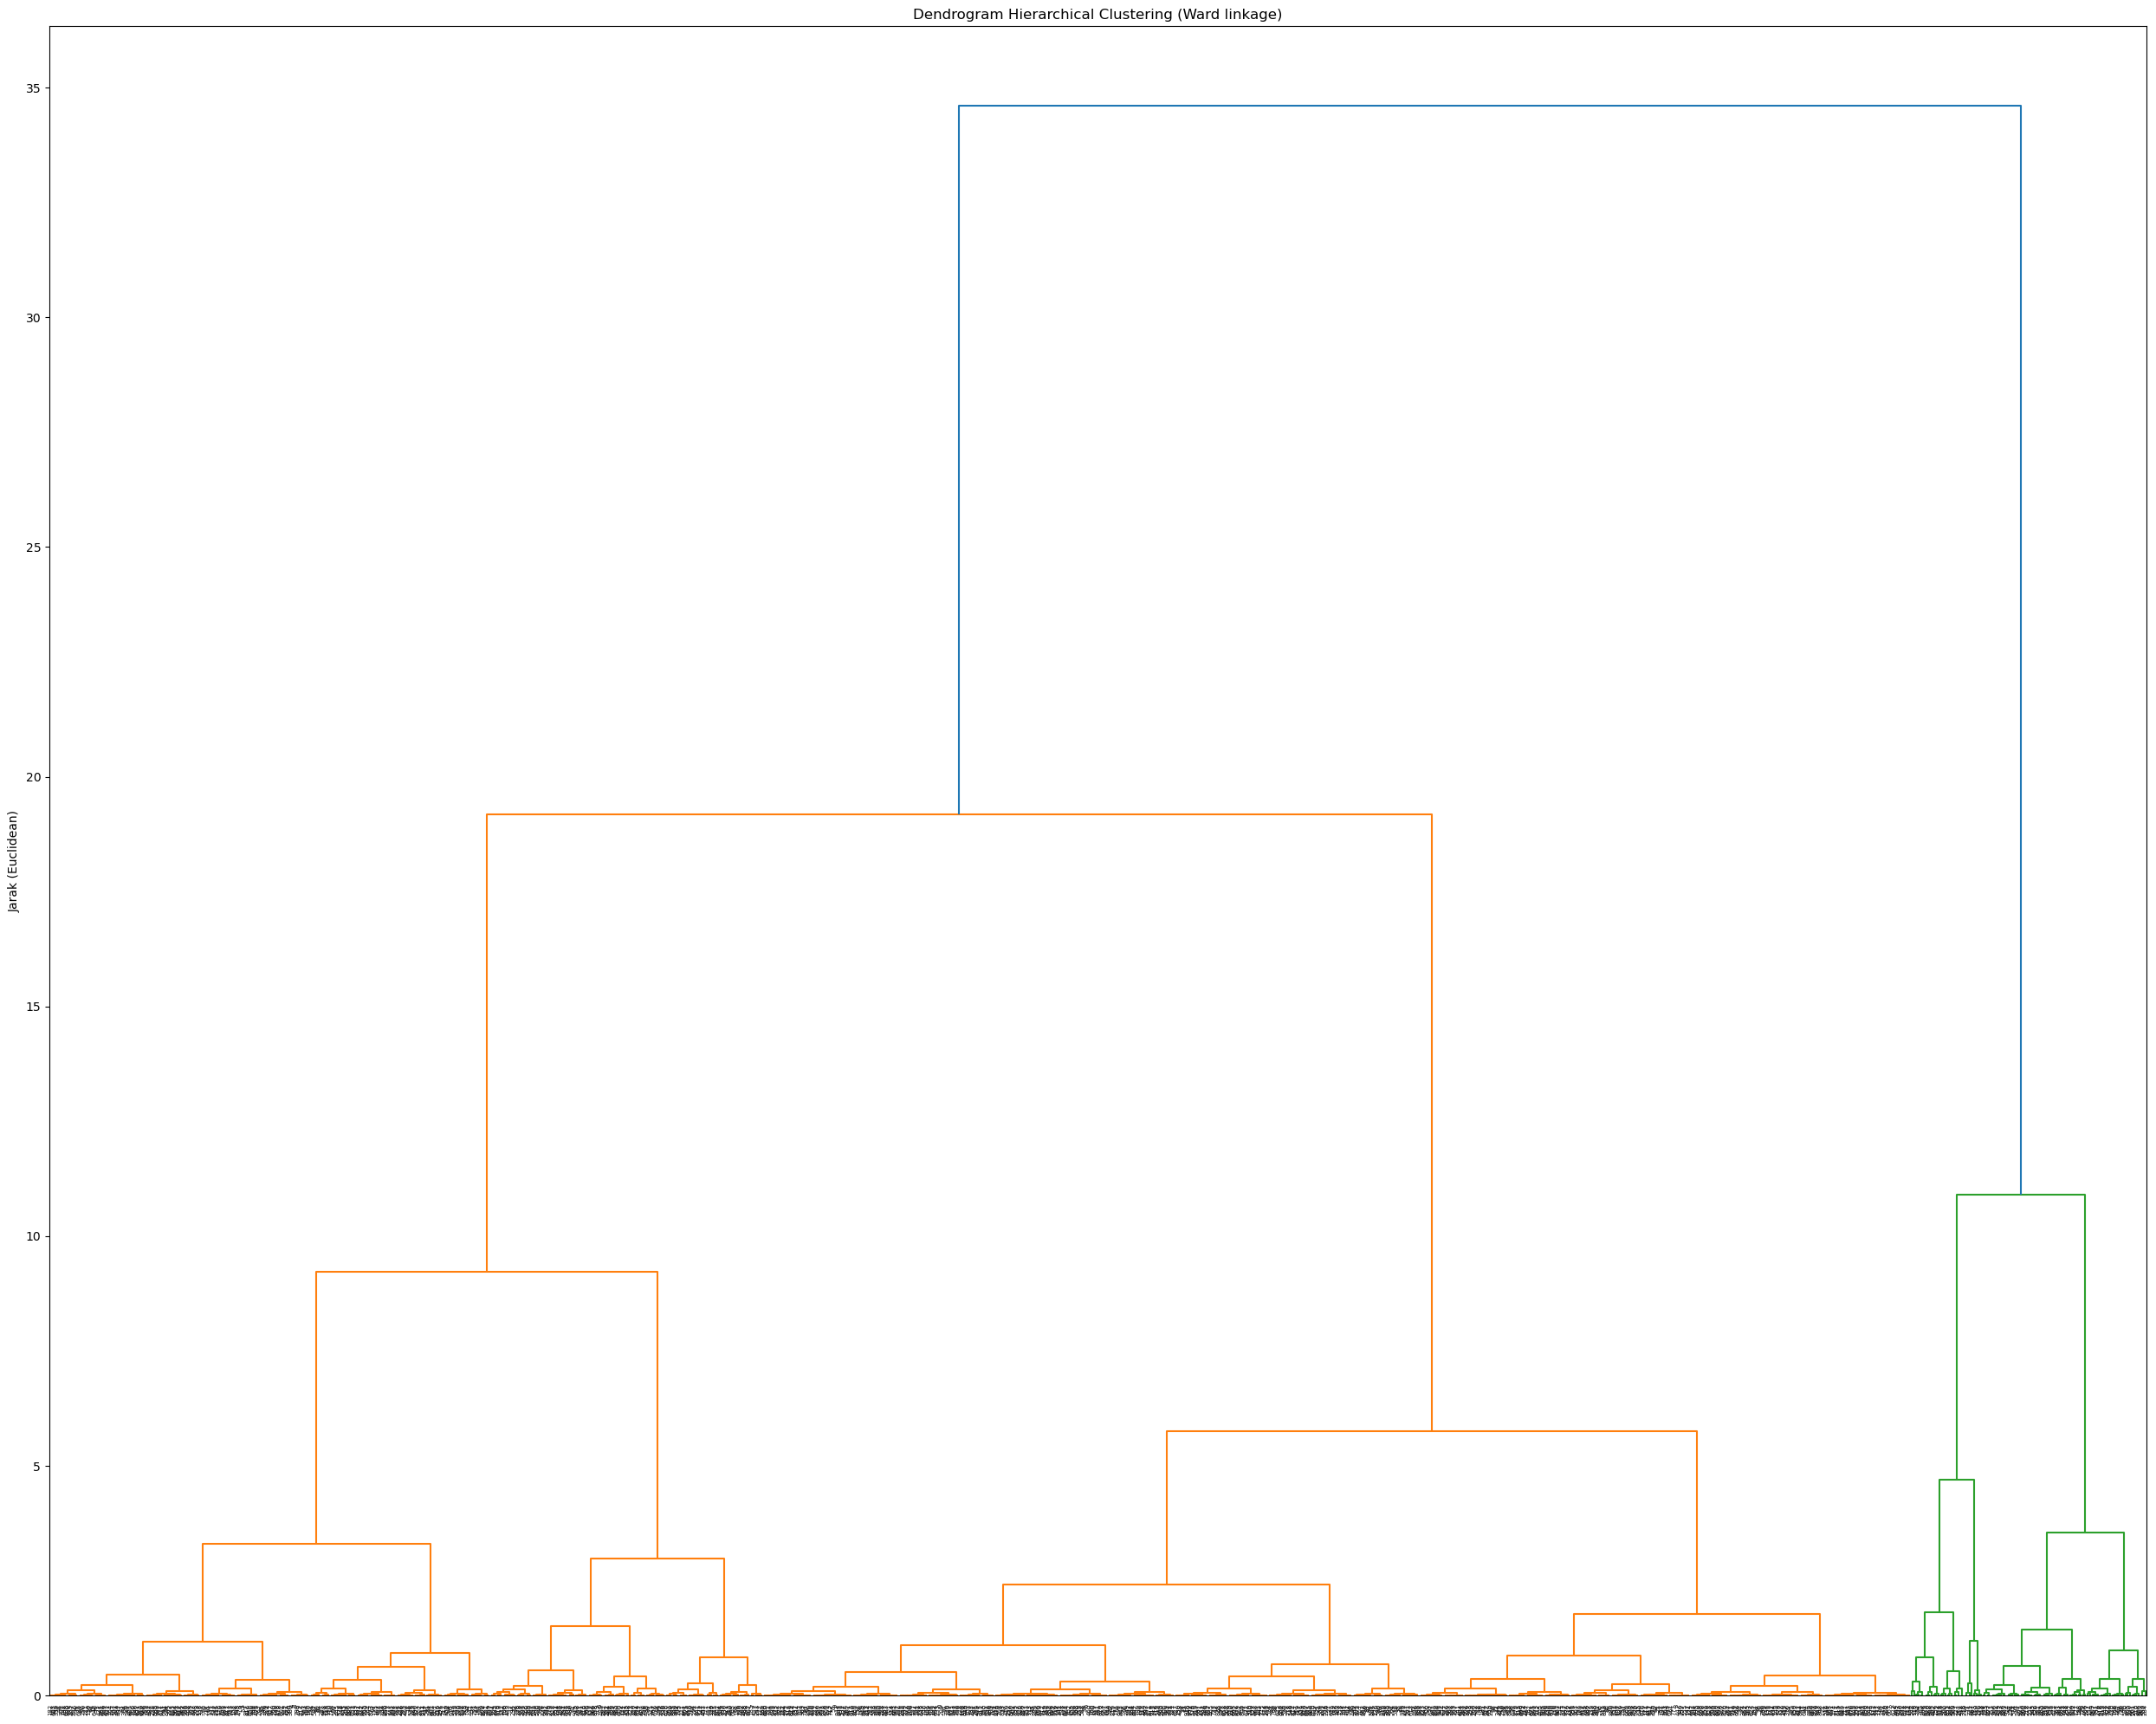

In [40]:
plt.figure(figsize=(25, 20))
dendrogram(linked, 
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True)  # Labels tidak digunakan
plt.title('Dendrogram Hierarchical Clustering (Ward linkage)')
plt.ylabel('Jarak (Euclidean)')
plt.tight_layout()
plt.show()

In [41]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
import numpy as np

# Hitung rata-rata volume gas per perusahaan
meanh2_perusahaan = df.groupby('Account Name')['Terukur m3'].mean().reset_index()

# Terapkan log-transformasi
meanh2_perusahaan['log_Terukur_m3'] = np.log1p(meanh2_perusahaan['Terukur m3'])

# Scaling data log-transform
x = meanh2_perusahaan[['log_Terukur_m3']]
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Clustering menggunakan Agglomerative Clustering
hierarchical = AgglomerativeClustering(n_clusters=2, linkage='ward')
meanh2_perusahaan['MeanH2_cluster'] = hierarchical.fit_predict(x_scaled)


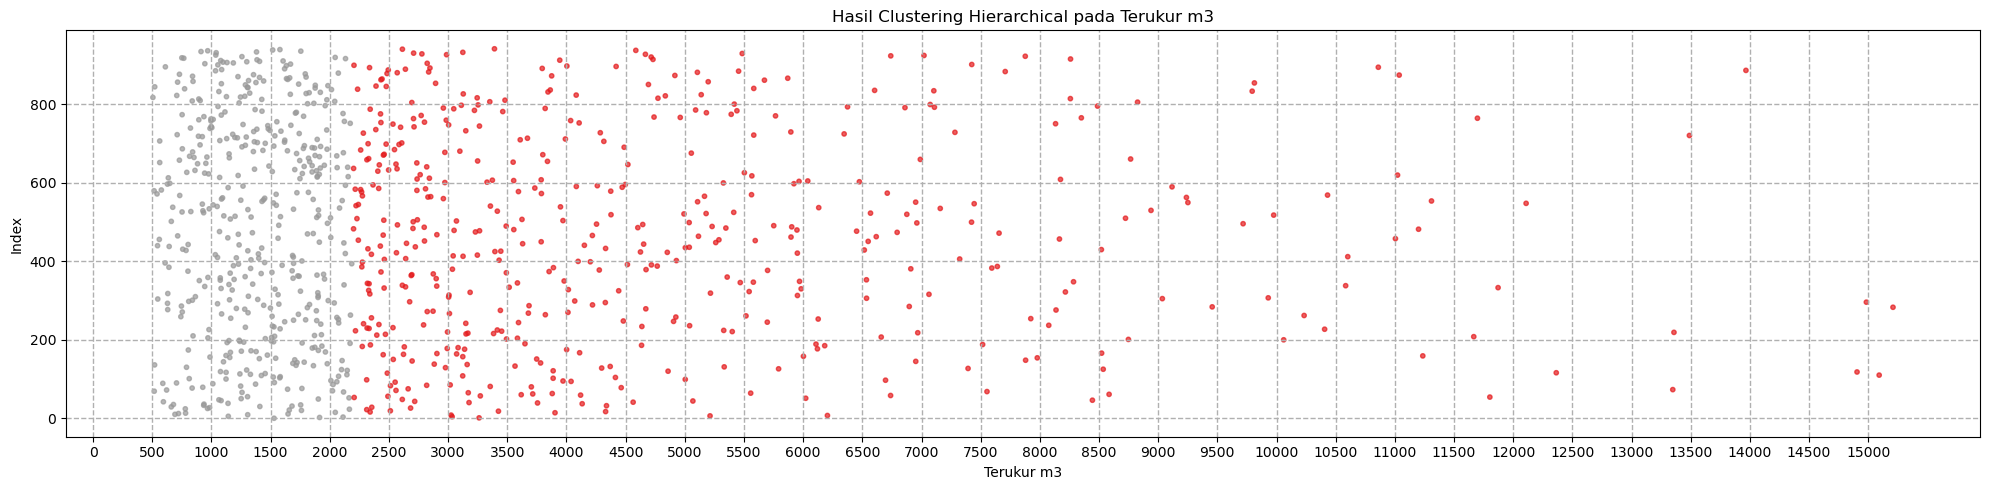

MeanH2_cluster
0    495
1    448
Name: count, dtype: int64


In [42]:
plt.figure(figsize=(20,5))
plt.scatter(meanh2_perusahaan['Terukur m3'], meanh2_perusahaan.index, c=meanh2_perusahaan['MeanH2_cluster'], cmap='Set1', s=10, alpha=0.7)
plt.title('Hasil Clustering Hierarchical pada Terukur m3')
plt.xlabel('Terukur m3')
plt.ylabel('Index')
max_x = meanh2_perusahaan['Terukur m3'].max()
plt.xticks(np.arange(0, max_x, 500))
plt.grid(True, linestyle='--', linewidth=1)
plt.tight_layout()
plt.show()

print(meanh2_perusahaan['MeanH2_cluster'].value_counts())

In [43]:
cluster_stats = meanh2_perusahaan.groupby('MeanH2_cluster')['Terukur m3'].describe()

print('\nDeskripsi Statistik Volume Pemakaian per Cluster :')
print(cluster_stats.to_markdown(tablefmt='grid', floatfmt='.2f'))


Deskripsi Statistik Volume Pemakaian per Cluster :
+------------------+---------+---------+---------+---------+---------+---------+---------+----------+
|   MeanH2_cluster |   count |    mean |     std |     min |     25% |     50% |     75% |      max |
+==================+=========+=========+=========+=========+=========+=========+=========+==========+
|                0 |  495.00 | 4778.19 | 2564.72 | 2200.90 | 2832.60 | 3970.42 | 5896.63 | 15208.95 |
+------------------+---------+---------+---------+---------+---------+---------+---------+----------+
|                1 |  448.00 | 1381.99 |  449.70 |  505.46 | 1036.25 | 1374.47 | 1764.96 |  2185.53 |
+------------------+---------+---------+---------+---------+---------+---------+---------+----------+


In [44]:
from sklearn.cluster import AgglomerativeClustering

x= df[['Terukur m3']]
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

hierarchical = AgglomerativeClustering(n_clusters = 2, linkage='ward')
df['H2_cluster'] = hierarchical.fit_predict(x_scaled)


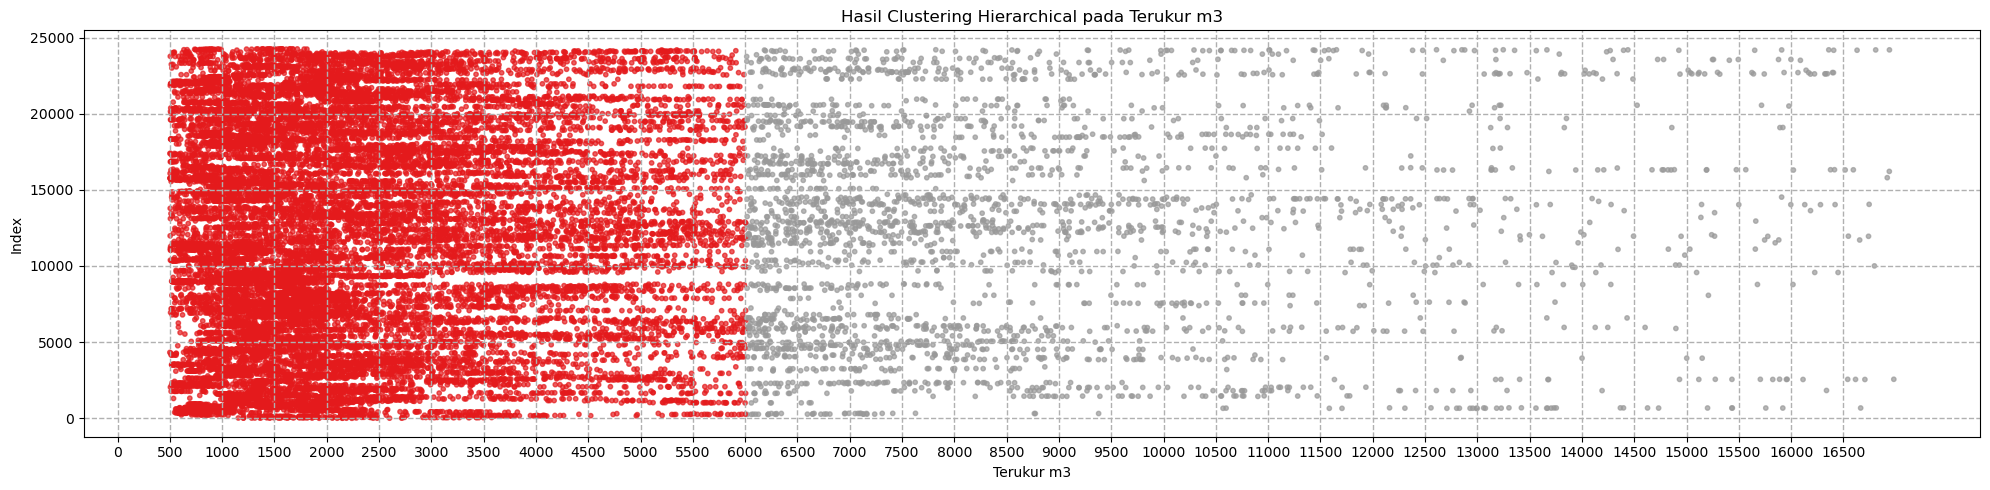

H2_cluster
0    21312
1     2951
Name: count, dtype: int64


In [45]:
plt.figure(figsize=(20,5))
plt.scatter(df['Terukur m3'], df.index, c=df['H2_cluster'], cmap='Set1', s=10, alpha=0.7)
plt.title('Hasil Clustering Hierarchical pada Terukur m3')
plt.xlabel('Terukur m3')
plt.ylabel('Index')
max_x = df['Terukur m3'].max()
plt.xticks(np.arange(0, max_x, 500))
plt.grid(True, linestyle='--', linewidth=1)
plt.tight_layout()
plt.show()

print(df['H2_cluster'].value_counts())

In [46]:
cluster_stats = df.groupby('H2_cluster')['Terukur m3'].describe()

print('\nDeskripsi Statistik Volume Pemakaian per Cluster :')
print(cluster_stats.to_markdown(tablefmt='grid', floatfmt='.2f'))


Deskripsi Statistik Volume Pemakaian per Cluster :
+--------------+----------+---------+---------+---------+---------+---------+---------+----------+
|   H2_cluster |    count |    mean |     std |     min |     25% |     50% |     75% |      max |
+==============+==========+=========+=========+=========+=========+=========+=========+==========+
|            0 | 21312.00 | 2363.68 | 1341.22 |  500.21 | 1300.81 | 2012.24 | 3176.94 |  6009.19 |
+--------------+----------+---------+---------+---------+---------+---------+---------+----------+
|            1 |  2951.00 | 8658.31 | 2484.10 | 6014.92 | 6787.83 | 7842.67 | 9763.50 | 16981.31 |
+--------------+----------+---------+---------+---------+---------+---------+---------+----------+


### Hierarchical 3 Clustering

In [48]:
from sklearn.cluster import AgglomerativeClustering

meanh3_perusahaan = df.groupby('Account Name')['Terukur m3'].mean().reset_index()

x= meanh3_perusahaan[['Terukur m3']]
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

hierarchical = AgglomerativeClustering(n_clusters = 3, linkage='ward')
meanh3_perusahaan['MeanH3_cluster'] = hierarchical.fit_predict(x_scaled)

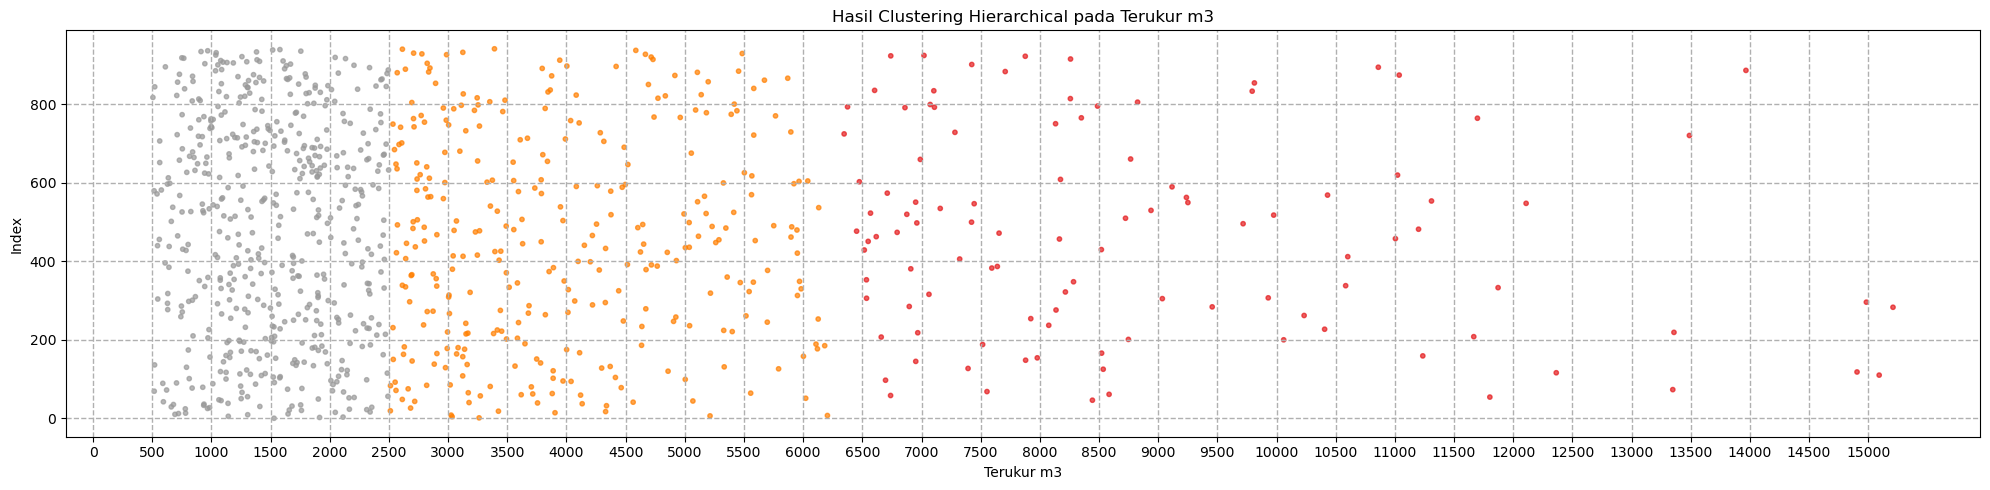

MeanH3_cluster
2    516
1    321
0    106
Name: count, dtype: int64


In [49]:
plt.figure(figsize=(20,5))
plt.scatter(meanh3_perusahaan['Terukur m3'], meanh3_perusahaan.index, c=meanh3_perusahaan['MeanH3_cluster'], cmap='Set1', s=10, alpha=0.7)
plt.title('Hasil Clustering Hierarchical pada Terukur m3')
plt.xlabel('Terukur m3')
plt.ylabel('Index')
max_x = meanh3_perusahaan['Terukur m3'].max()
plt.xticks(np.arange(0, max_x, 500))
plt.grid(True, linestyle='--', linewidth=1)
plt.tight_layout()
plt.show()

print(meanh3_perusahaan['MeanH3_cluster'].value_counts())

In [50]:
cluster_stats = meanh3_perusahaan.groupby('MeanH3_cluster')['Terukur m3'].describe()

print('\nDeskripsi Statistik Volume Pemakaian per Cluster :')
print(cluster_stats.to_markdown(tablefmt='grid', floatfmt='.2f'))


Deskripsi Statistik Volume Pemakaian per Cluster :
+------------------+---------+---------+---------+---------+---------+---------+----------+----------+
|   MeanH3_cluster |   count |    mean |     std |     min |     25% |     50% |      75% |      max |
+==================+=========+=========+=========+=========+=========+=========+==========+==========+
|                0 |  106.00 | 8837.24 | 2235.01 | 6346.15 | 7031.58 | 8195.01 | 10039.27 | 15208.95 |
+------------------+---------+---------+---------+---------+---------+---------+----------+----------+
|                1 |  321.00 | 3951.49 | 1058.76 | 2511.92 | 3011.11 | 3786.25 |  4766.96 |  6205.07 |
+------------------+---------+---------+---------+---------+---------+---------+----------+----------+
|                2 |  516.00 | 1510.00 |  533.61 |  505.46 | 1081.70 | 1502.61 |  1913.24 |  2497.30 |
+------------------+---------+---------+---------+---------+---------+---------+----------+----------+


In [51]:
from sklearn.cluster import AgglomerativeClustering

x= df[['Terukur m3']]
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

hierarchical = AgglomerativeClustering(n_clusters = 3, linkage='ward')
df['H3_cluster'] = hierarchical.fit_predict(x_scaled)


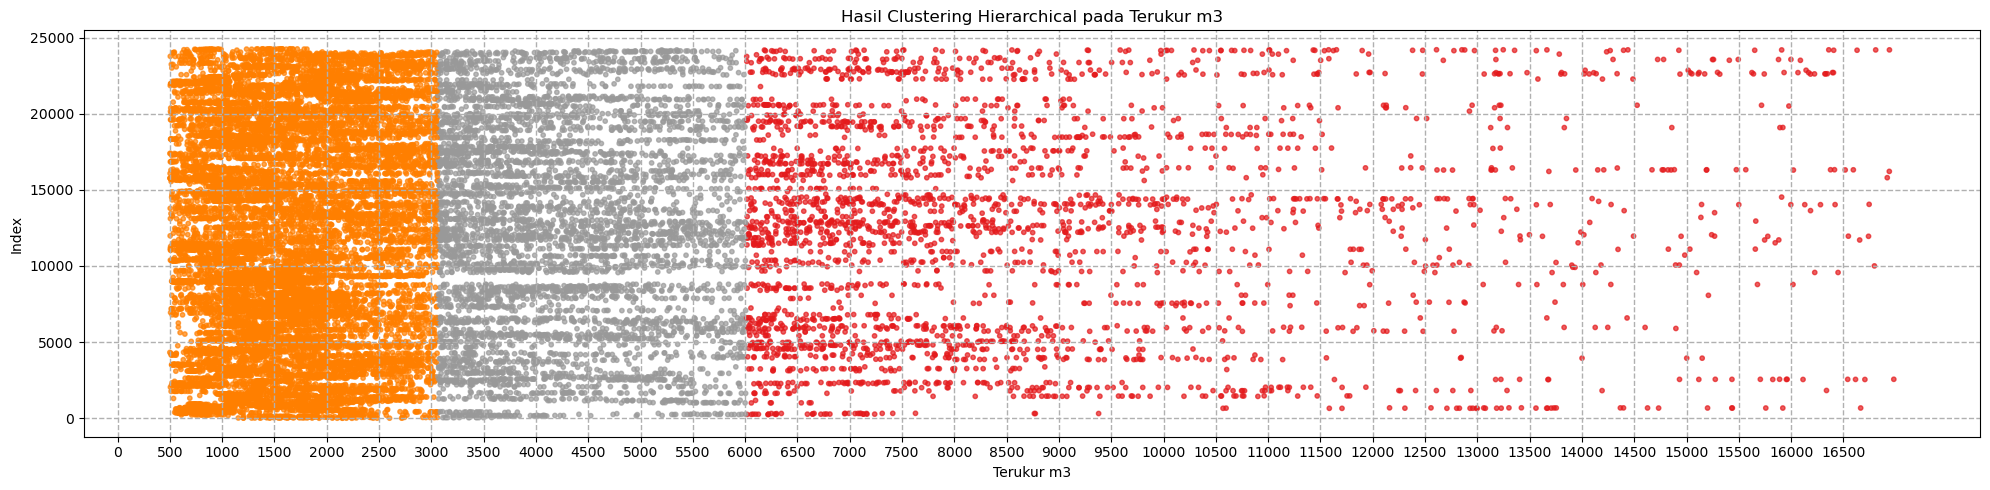

H3_cluster
1    15583
2     5729
0     2951
Name: count, dtype: int64


In [52]:
plt.figure(figsize=(20,5))
plt.scatter(df['Terukur m3'], df.index, c=df['H3_cluster'], cmap='Set1', s=10, alpha=0.7)
plt.title('Hasil Clustering Hierarchical pada Terukur m3')
plt.xlabel('Terukur m3')
plt.ylabel('Index')
max_x = df['Terukur m3'].max()
plt.xticks(np.arange(0, max_x, 500))
plt.grid(True, linestyle='--', linewidth=1)
plt.tight_layout()
plt.show()

print(df['H3_cluster'].value_counts())

In [53]:
cluster_stats = df.groupby('H3_cluster')['Terukur m3'].describe()

print('\nDeskripsi Statistik Volume Pemakaian per Cluster :')
print(cluster_stats.to_markdown(tablefmt='grid', floatfmt='.2f'))


Deskripsi Statistik Volume Pemakaian per Cluster :
+--------------+----------+---------+---------+---------+---------+---------+---------+----------+
|   H3_cluster |    count |    mean |     std |     min |     25% |     50% |     75% |      max |
+==============+==========+=========+=========+=========+=========+=========+=========+==========+
|            0 |  2951.00 | 8658.31 | 2484.10 | 6014.92 | 6787.83 | 7842.67 | 9763.50 | 16981.31 |
+--------------+----------+---------+---------+---------+---------+---------+---------+----------+
|            1 | 15583.00 | 1674.12 |  663.73 |  500.21 | 1127.05 | 1621.84 | 2176.65 |  3058.54 |
+--------------+----------+---------+---------+---------+---------+---------+---------+----------+
|            2 |  5729.00 | 4239.29 |  825.92 | 3059.63 | 3516.73 | 4100.84 | 4889.47 |  6009.19 |
+--------------+----------+---------+---------+---------+---------+---------+---------+----------+


# Summary 2 Segmen

In [143]:
import pandas as pd

# Pastikan kolom bertipe float
df['Terukur m3'] = df['Terukur m3'].astype(float)

summary_list = []

for perusahaan in df['Account Name'].unique():
    data_perusahaan = df[df['Account Name'] == perusahaan]
    total_data = len(data_perusahaan)
    
    sum_volume = data_perusahaan['Terukur m3'].sum()
    mean_volume = data_perusahaan['Terukur m3'].mean()
    median_volume = data_perusahaan['Terukur m3'].median()
    min_volume = data_perusahaan['Terukur m3'].min()
    max_volume = data_perusahaan['Terukur m3'].max()

    # Kelompokkan sesuai range
    data_0_1000 = data_perusahaan[(data_perusahaan['Terukur m3'] >= 0) & (data_perusahaan['Terukur m3'] < 1001)]
    data_1001_3600 = data_perusahaan[(data_perusahaan['Terukur m3'] >= 1001) & (data_perusahaan['Terukur m3'] <= 3600)]
    data_0_3600 = data_perusahaan[(data_perusahaan['Terukur m3'] >= 0) & (data_perusahaan['Terukur m3'] <= 3600)]
    data_3601_10000 = data_perusahaan[(data_perusahaan['Terukur m3'] > 3600) & (data_perusahaan['Terukur m3'] <= 10000)]
    data_10000_up = data_perusahaan[data_perusahaan['Terukur m3'] > 10000]
    data_3600_up = data_perusahaan[data_perusahaan['Terukur m3'] > 3600]

    # Hitung jumlah (pakai int untuk pastikan akurat)
    jumlah_0_1000 = int(len(data_0_1000))
    jumlah_1001_3600 = int(len(data_1001_3600))
    jumlah_0_3600 = int(len(data_0_3600))
    jumlah_3601_10000 = int(len(data_3601_10000))
    jumlah_10000_up = int(len(data_10000_up))
    jumlah_3600_up = int(len(data_3600_up))

    # Hitung persentase
    persentase_0_1000 = round(jumlah_0_1000 / total_data * 100, 2) if total_data > 0 else 0
    persentase_1001_3600 = round(jumlah_1001_3600 / total_data * 100, 2) if total_data > 0 else 0
    persentase_0_3600 = round(jumlah_0_3600 / total_data * 100, 2) if total_data > 0 else 0
    persentase_3601_10000 = round(jumlah_3601_10000 / total_data * 100, 2) if total_data > 0 else 0
    persentase_10000_up = round(jumlah_10000_up / total_data * 100, 2) if total_data > 0 else 0
    persentase_3600_up = round(jumlah_3600_up / total_data * 100, 2) if total_data > 0 else 0

    summary_list.append({
        'Account Name': perusahaan,
        'Sum_Volume': round(sum_volume, 2),
        'Mean_Volume': round(mean_volume, 2),
        'Median_Volume': round(median_volume, 2),
        'Min_Volume': round(min_volume, 2),
        'Max_Volume': round(max_volume, 2),
        'Total_Data': total_data,
        'Jumlah Dalam Range (0–1000)': jumlah_0_1000,
        'Persentase Dalam Range (0–1000)': persentase_0_1000,
        'Jumlah Dalam Range (1001–3600)': jumlah_1001_3600,
        'Persentase Dalam Range (1001–3600)': persentase_1001_3600,
        'Jumlah Dalam Range (3601–10000)': jumlah_3601_10000,
        'Persentase Dalam Range (3601–10000)': persentase_3601_10000,
        'Jumlah Dalam Range (>10000)': jumlah_10000_up,
        'Persentase Dalam Range (>10000)': persentase_10000_up,
        'Jumlah Dalam Range (0–3600)': jumlah_0_3600,
        'Persentase Dalam Range (0–3600)': persentase_0_3600,
        'Jumlah Dalam Range (>3600)': jumlah_3600_up,
        'Persentase Dalam Range (>3600)': persentase_3600_up
    })

# Konversi ke DataFrame hasil summary
summary_perusahaan = pd.DataFrame(summary_list)

# Tambahkan klasifikasi range
def categorize_1000(row):
    min_val = row['Min_Volume']
    max_val = row['Max_Volume']
    if max_val <= 3600:
        return '0–3600'
    elif min_val > 3600:
        return '3601–habis'
    else:
        return 'Fluktuatif'

summary_perusahaan['Range'] = summary_perusahaan.apply(categorize_1000, axis=1)

# Hitung jumlah kategori
range_count = summary_perusahaan['Range'].value_counts().reset_index()
range_count.columns = ['Range', 'Jumlah Account Name']

# Urutkan sesuai urutan logis
urutan_range = ['0–3600', '3601–habis', 'Fluktuatif']
range_count['Range'] = pd.Categorical(range_count['Range'], categories=urutan_range, ordered=True)
range_count = range_count.sort_values('Range').reset_index(drop=True)

# Simpan ke Excel
output_file = 'laporan_perusahaan_final_Bronze1.xlsx'
summary_perusahaan.to_excel(output_file, index=False)
print(f"✅ File Excel berhasil disimpan sebagai: {output_file}")

# Tampilkan hasil klasifikasi
print("\nJumlah Akun per Kategori Range:")
print(range_count)

✅ File Excel berhasil disimpan sebagai: laporan_perusahaan_final_Bronze1.xlsx

Jumlah Akun per Kategori Range:
        Range  Jumlah Account Name
0      0–3600                  507
1  3601–habis                  106
2  Fluktuatif                  330


In [113]:
def categorize(row):
    min_val = row['Min_Volume']
    max_val = row['Max_Volume']
    
    if min_val >= 0 and max_val <= 3500:
        return '0–4700'
    elif min_val > 3500:
        return '4701–habis'
    else:
        
        return 'Fluktuatif'

summary_perusahaan['Range'] = summary_perusahaan.apply(categorize, axis=1)

range_count = summary_perusahaan['Range'].value_counts().reset_index()
range_count.columns = ['Range', 'Jumlah Account Name']

urutan_range = ['0–4700', '4701–habis', 'Fluktuatif']
range_count['Range'] = pd.Categorical(range_count['Range'], categories=urutan_range, ordered=True)
range_count = range_count.sort_values('Range').reset_index(drop=True)

# Tampilkan hasil
print(range_count)

        Range  Jumlah Account Name
0      0–4700                  495
1  4701–habis                  111
2  Fluktuatif                  337


In [57]:
def categorize(row):
    min_val = row['Min_Volume']
    max_val = row['Max_Volume']
    
    if min_val >= 0 and max_val < 1000:
        return '0-1000'
    elif min_val >= 1001 and max_val <= 4700:
        return '1001-4700'
    elif min_val >= 4701 and max_val <= 10000:
        return '4701-10000'
    elif min_val >= 10001:
        return '10001-habis'
    else:
        return 'Fluktuatif'

summary_perusahaan['Range'] = summary_perusahaan.apply(categorize, axis=1)

range_count = summary_perusahaan['Range'].value_counts().reset_index()
range_count.columns = ['Range', 'Jumlah Account Name']

urutan_range = ['0-1000', '1001-4700', '4701-10000', '10001-habis','Fluktuatif']
range_count['Range'] = pd.Categorical(range_count['Range'], categories=urutan_range, ordered=True)
range_count = range_count.sort_values('Range').reset_index(drop=True)

# Tampilkan hasil
print(range_count)

         Range  Jumlah Account Name
0       0-1000                   49
1    1001-4700                  314
2   4701-10000                   22
3  10001-habis                    7
4   Fluktuatif                  551


In [145]:
df_new = pd.read_excel(r"C:\Users\Aditya P J\Documents\Magang dan KKN\Magang\Proyek\laporan_perusahaan_final_Bronze1.xlsx")
df_new.head()

Account Name  Sum_Volume  Mean_Volume  \
0  REKSO NASIONAL FOOD, PT (MC DONALDS R. SOEKAMT...    64204.74      1783.46   
1           RAJAWALI OKTA GUNA, PT (SENTOSA SEAFOOD)    99499.26      2763.87   
2                                  RM. KWETIAU AKANG    64283.16      1785.64   
3                                         PEMPEK EDY    57001.01      1583.36   
4                                        LALA PEMPEK   138715.02      3853.20   

   Median_Volume  Min_Volume  Max_Volume  Total_Data  \
0        1712.99     1154.65     2715.97          36   
1        2932.87     1811.47     3576.32          36   
2        1792.48     1418.30     2429.70          36   
3        1571.12     1204.78     2030.43          36   
4        3744.29     3284.15     5206.44          36   

   Jumlah Dalam Range (0–1000)  Persentase Dalam Range (0–1000)  \
0                            0                              0.0   
1                            0                              0.0   
2                            0                              0.0   
3                            0                              0.0   
4                            0                              0.0   

   Jumlah Dalam Range (1001–3600)  Persentase Dalam Range (1001–3600)  \
0                              36                              100.00   
1                              36                              100.00   
2                              36                              100.00   
3                              36                              100.00   
4                              11                               30.56   

   Jumlah Dalam Range (3601–10000)  Persentase Dalam Range (3601–10000)  \
0                                0                                 0.00   
1                                0                                 0.00   
2                                0                                 0.00   
3                                0                                 0.00   
4                               25                                69.44   

   Jumlah Dalam Range (>10000)  Persentase Dalam Range (>10000)  \
0                            0                              0.0   
1                            0                              0.0   
2                            0                              0.0   
3                            0                              0.0   
4                            0                              0.0   

   Jumlah Dalam Range (0–3600)  Persentase Dalam Range (0–3600)  \
0                           36                           100.00   
1                           36                           100.00   
2                           36                           100.00   
3                           36                           100.00   
4                           11                            30.56   

   Jumlah Dalam Range (>3600)  Persentase Dalam Range (>3600)       Range  
0                           0                            0.00      0–3600  
1                           0                            0.00      0–3600  
2                           0                            0.00      0–3600  
3                           0                            0.00      0–3600  
4                          25                           69.44  Fluktuatif

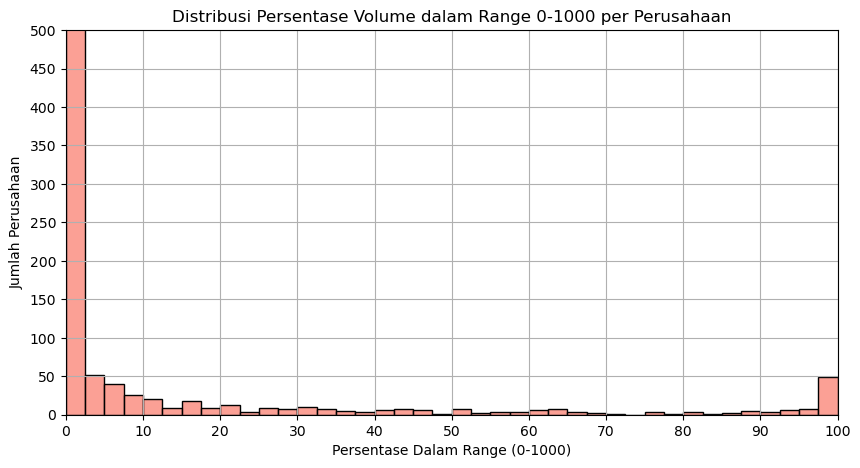

In [59]:
plt.figure(figsize=(10,6))
sns.histplot(df_new['Persentase Dalam Range (0–1000)'], kde=False, bins=40, color='salmon')
plt.title('Distribusi Persentase Volume dalam Range 0-1000 per Perusahaan')
plt.xlabel('Persentase Dalam Range (0-1000)')
plt.ylabel('Jumlah Perusahaan')
plt.grid(True)
plt.xlim(0, 100)
plt.ylim(0, 500)
plt.xticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
plt.yticks(range(0, 501, 50))
plt.tight_layout()
plt.subplots_adjust(left=0.2, bottom=0.3)
plt.show()

In [72]:
total = df_new['Mean_Volume'].sum()
print(total)

2984335.0999999996


C:\Users\Aditya P J\AppData\Local\Temp\ipykernel_24608\2492944755.py:53: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  percentage = f'{(value / totals[j] * 100):.1f}%'
C:\Users\Aditya P J\AppData\Local\Temp\ipykernel_24608\2492944755.py:53: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  percentage = f'{(value / totals[j] * 100):.1f}%'
C:\Users\Aditya P J\AppData\Local\Temp\ipykernel_24608\2492944755.py:53: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use

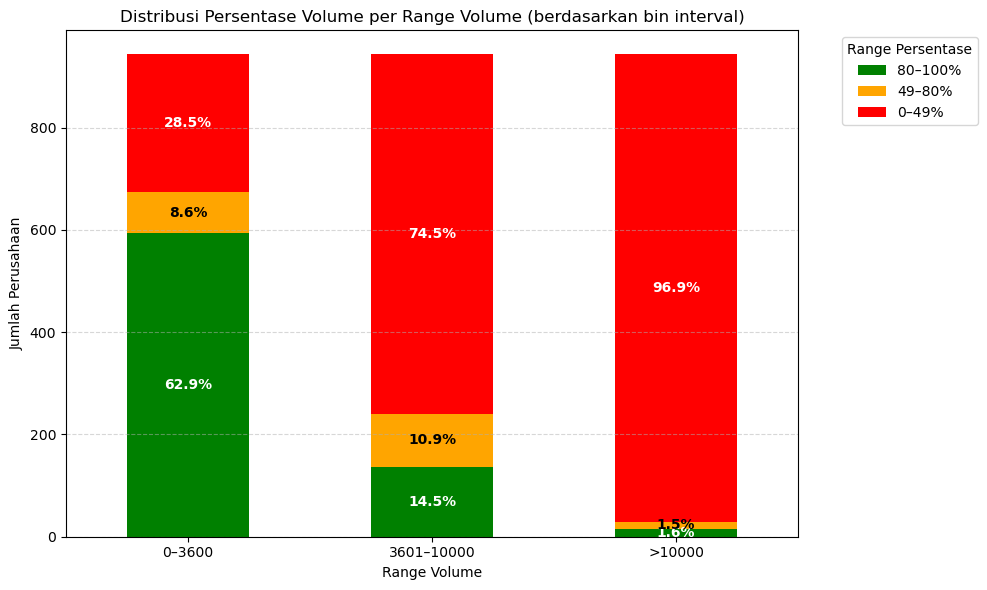


Tabel Frekuensi per Range:
                80–100%       49–80%        0–49%
0–3600      593 (62.9%)    81 (8.6%)  269 (28.5%)
3601–10000  137 (14.5%)  103 (10.9%)  703 (74.5%)
>10000        15 (1.6%)    14 (1.5%)  914 (96.9%)


In [147]:
import pandas as pd
import matplotlib.pyplot as plt

# Definisikan bin
bins = [0, 49, 80, 100]

# Fungsi label bin
def format_range(bin_interval):
    return f"{int(bin_interval.left)}–{int(bin_interval.right)}%"

# Inisialisasi dataframe hasil
frekuensi_range_bin = pd.DataFrame()

# Loop setiap kolom persentase
for col, nama in zip(['Persentase Dalam Range (0–3600)',
                      'Persentase Dalam Range (3601–10000)',
                      'Persentase Dalam Range (>10000)'],
                     ['0–3600', '3601–10000', '>10000']):
    
    # Hitung distribusi frekuensi dalam bin
    frekuensi = pd.cut(df_new[col], bins=bins, include_lowest=True).value_counts().sort_index()
    
    # Masukkan ke dataframe
    frekuensi_range_bin[nama] = frekuensi.values

# Format ulang index jadi label string
frekuensi_range_bin.index = [format_range(interval) for interval in frekuensi.index]

# Urutkan agar: 80–100% (green), 49–80% (orange), 0–49% (red)
frekuensi_range_bin = frekuensi_range_bin.loc[['80–100%', '49–80%', '0–49%']]

# Plot stacked bar chart
ax = frekuensi_range_bin.T.plot(kind='bar', stacked=True, figsize=(10,6),
                                color=['green', 'orange', 'red'])

plt.title('Distribusi Persentase Volume per Range Volume (berdasarkan bin interval)')
plt.ylabel('Jumlah Perusahaan')
plt.xlabel('Range Volume')
plt.xticks(rotation=0)
plt.legend(title='Range Persentase', bbox_to_anchor=(1.05, 1))
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()

# Hitung total per kategori range volume
totals = frekuensi_range_bin.T.sum(axis=1)

# Tambahkan label persentase di setiap bagian bar
for i, (colname, color) in enumerate(zip(['80–100%', '49–80%', '0–49%'], 
                                         ['green', 'orange', 'red'])):
    for j, (idx, row) in enumerate(frekuensi_range_bin.T.iterrows()):
        value = row[colname]
        if value > 0:
            percentage = f'{(value / totals[j] * 100):.1f}%'
            
            # Posisi teks
            if i == 0:
                y_pos = value / 2
            elif i == 1:
                y_pos = frekuensi_range_bin.T.iloc[j]['80–100%'] + value / 2
            else:
                y_pos = frekuensi_range_bin.T.iloc[j][['80–100%', '49–80%']].sum() + value / 2
            
            ax.text(j, y_pos, percentage, 
                    ha='center', va='center',
                    color='white' if color in ['green', 'red'] else 'black',
                    fontweight='bold')

plt.show()

# Tampilkan tabel frekuensi + persentase
print("\nTabel Frekuensi per Range:")
percentage_df = (frekuensi_range_bin.T.div(totals, axis=0) * 100)
combined_df = frekuensi_range_bin.T.astype(str) + " (" + percentage_df.round(1).astype(str) + "%)"
print(combined_df.to_string())


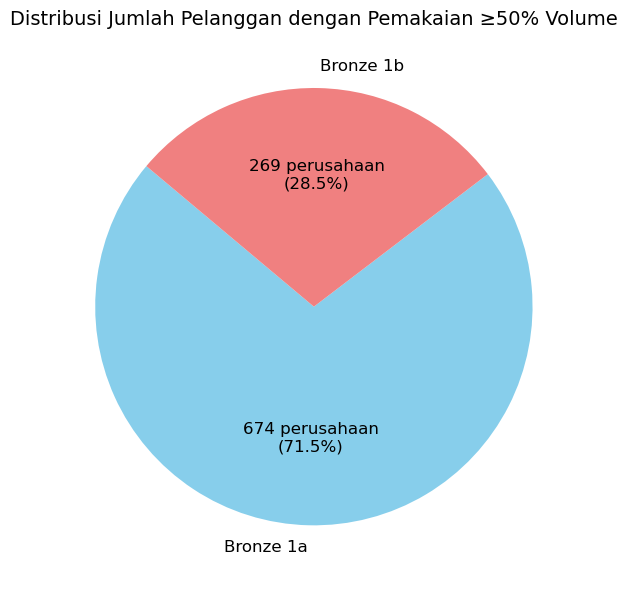

Jumlah pelanggan dengan ≥50% pemakaian di range 0–3600 m³: 674
Jumlah pelanggan dengan ≥50% pemakaian di range ≥3601 m³: 269


In [153]:
import pandas as pd
import matplotlib.pyplot as plt

# Definisikan bin
bins = [0, 49, 80, 100]

# Fungsi label bin
def format_range(bin_interval):
    return f"{int(bin_interval.left)}–{int(bin_interval.right)}%"

# Inisialisasi dataframe hasil
frekuensi_range_bin = pd.DataFrame()

# Loop setiap kolom persentase
for col, nama in zip(['Persentase Dalam Range (0–3600)',
                      'Persentase Dalam Range (3601–10000)',
                      'Persentase Dalam Range (>10000)'],
                     ['0–3600', '3601–10000', '>10000']):
    
    frekuensi = pd.cut(df_new[col], bins=bins, include_lowest=True).value_counts().sort_index()
    frekuensi_range_bin[nama] = frekuensi.values

# Format ulang index jadi label string
frekuensi_range_bin.index = [format_range(interval) for interval in frekuensi.index]

# Ambil hanya yang ≥50% (gabungan 49–80% dan 80–100%)
range_0_3600 = frekuensi_range_bin.loc[['80–100%', '49–80%'], '0–3600'].sum()
range_ge_3600 = frekuensi_range_bin.loc[['80–100%', '49–80%'], ['3601–10000', '>10000']].sum().sum()

# Siapkan data pie chart
labels = ['Bronze 1a', 'Bronze 1b']
values = [range_0_3500, range_ge_3500]
colors = ['skyblue', 'lightcoral']

# Fungsi untuk menampilkan jumlah dan persentase sekaligus
def make_autopct(values):
    def autopct(pct):
        total = sum(values)
        val = int(round(pct * total / 100.0))
        return f"{val} perusahaan\n({pct:.1f}%)"
    return autopct

# Plot pie chart
plt.figure(figsize=(6, 6))
plt.pie(values, labels=labels, autopct=make_autopct(values), colors=colors,
        startangle=140, textprops={'fontsize': 12})
plt.title('Distribusi Jumlah Pelanggan dengan Pemakaian ≥50% Volume', fontsize=14)
plt.tight_layout()
plt.show()

# Cetak nilai aktual
print(f"Jumlah pelanggan dengan ≥50% pemakaian di range 0–3600 m³: {range_0_3600}")
print(f"Jumlah pelanggan dengan ≥50% pemakaian di range ≥3601 m³: {range_ge_3600}")


In [157]:
# Filter pelanggan Bronze 1a (≥50% pemakaian di range 0–4500 m³)
bronze_1a = df_new[
    (df_new['Persentase Dalam Range (0–3600)'] >= 50)  # Ambil yang ≥50% di range gabungan 0–4500
]
total_volume_1a = bronze_1a['Mean_Volume'].sum()  # Gunakan mean volume per pelanggan

# Filter pelanggan Bronze 1b (≥50% pemakaian di range >4500 m³)
bronze_1b = df_new[
    (df_new['Persentase Dalam Range (>3600)'] >= 50)  # Ambil yang ≥50% di range >4500
]
total_volume_1b = bronze_1b['Mean_Volume'].sum()  # Gunakan mean volume per pelanggan

# Output hasil
print(f"Total Volume Aktual Bronze 1a (0–3600 m³): {total_volume_1a:.2f} m³")
print(f"Total Volume Aktual Bronze 1b (>3600 m³): {total_volume_1b:.2f} m³")
print(f"Perbandingan: Bronze 1b/Bronze 1a = {total_volume_1b/total_volume_1a:.2f}x")

Total Volume Aktual Bronze 1a (0–3600 m³): 1272589.98 m³
Total Volume Aktual Bronze 1b (>3600 m³): 1747429.71 m³
Perbandingan: Bronze 1b/Bronze 1a = 1.37x


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


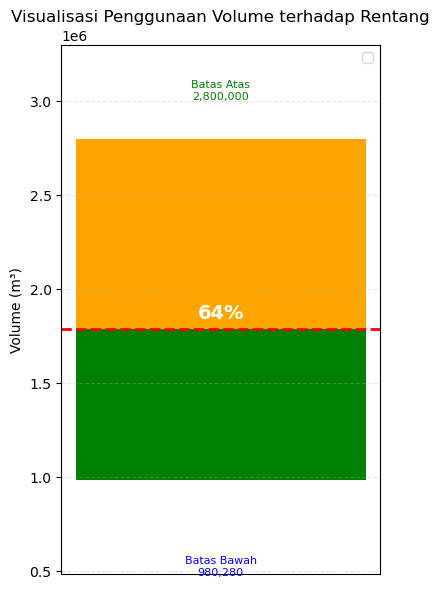

In [135]:
import matplotlib.pyplot as plt

# Data
batas_bawah = 980280
rata_rata = 1786938
batas_atas = 2800000

# Hitung rentang
total_rentang = batas_atas
pemakaian = rata_rata 
sisa = batas_atas - rata_rata
persentase = pemakaian / total_rentang * 100

# Grafik batang bertumpuk
plt.figure(figsize=(4, 6))
plt.bar(x=[''], height=[pemakaian], bottom=batas_bawah, color='Green', width=0.5)
plt.bar(x=[''], height=[sisa], bottom=rata_rata, color='Orange', width=0.5)

# Garis dan label rata-rata
plt.axhline(y=rata_rata, color='Red', linestyle='--', linewidth=2)
plt.text(0, rata_rata + 100000, f'Rata-rata\n{rata_rata:,}', ha='center', va='bottom', fontsize=9, color='orange')

# Label batas bawah dan atas
plt.text(0, batas_bawah - 400000, f'Batas Bawah\n{batas_bawah:,}', ha='center', va='top', fontsize=8, color='blue')
plt.text(0, batas_atas + 200000, f'Batas Atas\n{batas_atas:,}', ha='center', va='bottom', fontsize=8, color='green')

# Persentase pemakaian di tengah batang hijau
plt.text(0, batas_bawah + pemakaian / 2, f'{persentase:.0f}%', ha='center', va='center', fontsize=14, color='white', weight='bold')

# Styling presentasi
plt.title('Visualisasi Penggunaan Volume terhadap Rentang', fontsize=12)
plt.ylabel('Volume (m³)', fontsize=10)
plt.xticks([])
plt.legend(loc='upper right')
plt.ylim(batas_bawah - 500000, batas_atas + 500000)
plt.grid(axis='y', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()

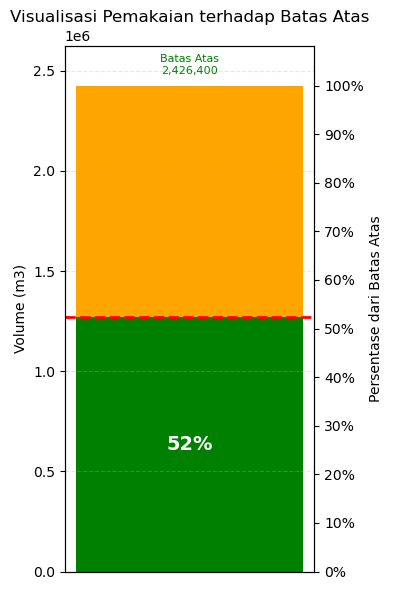

In [159]:
import matplotlib.pyplot as plt

# Data
batas_bawah = 674674
rata_rata = 1272590
batas_atas = 2426400

# Hitung persentase terhadap batas atas
persentase = rata_rata / batas_atas * 100
tinggi_hijau = rata_rata
tinggi_oranye = batas_atas - rata_rata

# Plot
fig, ax1 = plt.subplots(figsize=(4, 6))

# Batang hijau: dari 0 ke rata-rata
ax1.bar(x=[''], height=[tinggi_hijau], bottom=0, color='green', width=0.5)

# Batang oranye: dari rata-rata ke batas atas
ax1.bar(x=[''], height=[tinggi_oranye], bottom=rata_rata, color='orange', width=0.5)

# Garis rata-rata
ax1.axhline(y=rata_rata, color='red', linestyle='--', linewidth=2)
ax1.text(0, rata_rata + 50000, f'Rata-rata\n{rata_rata:,}', ha='center', va='bottom', fontsize=9, color='orange')

# Label batas bawah dan atas
ax1.text(0, batas_atas + 50000, f'Batas Atas\n{batas_atas:,}', ha='center', va='bottom', fontsize=8, color='green')

# Label persentase di tengah batang hijau
ax1.text(0, tinggi_hijau / 2, f'{persentase:.0f}%', ha='center', va='center', fontsize=14, color='white', weight='bold')

# Styling axis utama
ax1.set_ylabel('Volume (m3)', fontsize=10)
ax1.set_ylim(0, batas_atas + 200_000)
ax1.set_xticks([])
ax1.set_title('Visualisasi Pemakaian terhadap Batas Atas', fontsize=12)
ax1.grid(axis='y', linestyle='--', alpha=0.3)

# Skala kedua (persentase)
ax2 = ax1.twinx()
ax2.set_ylim(ax1.get_ylim())
persen_ticks = [i for i in range(0, 110, 10)]
persen_values = [(p / 100) * batas_atas for p in persen_ticks]
ax2.set_yticks(persen_values)
ax2.set_yticklabels([f'{p}%' for p in persen_ticks])
ax2.set_ylabel('Persentase dari Batas Atas', fontsize=10)

plt.tight_layout()
plt.show()


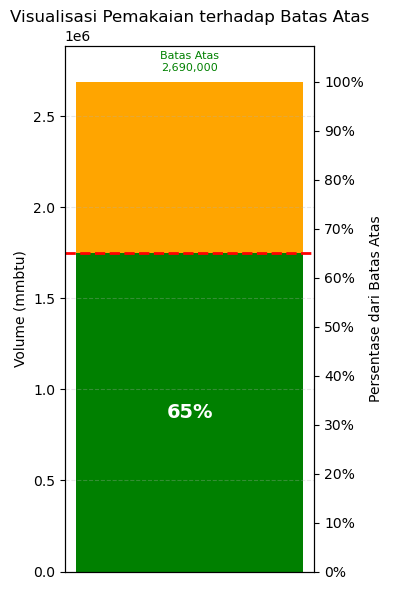

In [163]:
import matplotlib.pyplot as plt

# Data
batas_bawah = 968669
rata_rata = 1747430
batas_atas = 2690000

# Hitung persentase terhadap batas atas
persentase = rata_rata / batas_atas * 100
tinggi_hijau = rata_rata
tinggi_oranye = batas_atas - rata_rata

# Plot
fig, ax1 = plt.subplots(figsize=(4, 6))

# Batang hijau: dari 0 ke rata-rata
ax1.bar(x=[''], height=[tinggi_hijau], bottom=0, color='green', width=0.5)

# Batang oranye: dari rata-rata ke batas atas
ax1.bar(x=[''], height=[tinggi_oranye], bottom=rata_rata, color='orange', width=0.5)

# Garis rata-rata
ax1.axhline(y=rata_rata, color='red', linestyle='--', linewidth=2)
ax1.text(0, rata_rata + 50000, f'Rata-rata\n{rata_rata:,}', ha='center', va='bottom', fontsize=9, color='orange')

# Label batas bawah dan atas
ax1.text(0, batas_atas + 50000, f'Batas Atas\n{batas_atas:,}', ha='center', va='bottom', fontsize=8, color='green')

# Label persentase di tengah batang hijau
ax1.text(0, tinggi_hijau / 2, f'{persentase:.0f}%', ha='center', va='center', fontsize=14, color='white', weight='bold')

# Styling axis utama
ax1.set_ylabel('Volume (mmbtu)', fontsize=10)
ax1.set_ylim(0, batas_atas + 200_000)
ax1.set_xticks([])
ax1.set_title('Visualisasi Pemakaian terhadap Batas Atas', fontsize=12)
ax1.grid(axis='y', linestyle='--', alpha=0.3)

# Skala kedua (persentase)
ax2 = ax1.twinx()
ax2.set_ylim(ax1.get_ylim())
persen_ticks = [i for i in range(0, 110, 10)]
persen_values = [(p / 100) * batas_atas for p in persen_ticks]
ax2.set_yticks(persen_values)
ax2.set_yticklabels([f'{p}%' for p in persen_ticks])
ax2.set_ylabel('Persentase dari Batas Atas', fontsize=10)

plt.tight_layout()
plt.show()


In [ ]:
nama_perusahaan = df['Account Name'].unique() 
print(nama_perusahaan)

nama_perusahaan_df = pd.DataFrame(nama_perusahaan, columns=['Account Name'])
print(nama_perusahaan_df)

In [ ]:
mean_sector = df.groupby('Sektor Industri')['Terukur m3'].mean().reset_index()

np.random.seed(42)
sector_mapping = {sector: i for i, sector in enumerate(df['Sektor Industri'].unique())}
mean_sector['X_code'] = mean_sector['Sektor Industri'].map(sector_mapping)
mean_sector['X_jittered'] = mean_sector['X_code'] + np.random.normal(0, 0.3, size=len(mean_sector))

plt.figure(figsize=(20, 15))

sns.scatterplot(
    x='X_jittered',
    y='Terukur m3',
    hue='Sektor Industri',
    data=mean_sector,
    palette='tab20',  
    alpha=0.7,
    legend='full',
    s = 150
)

sorted_sectors = sorted(sector_mapping.items(), key=lambda x: x[1])
plt.xticks(
    ticks=[code for sector, code in sorted_sectors],
    labels=[sector for sector, code in sorted_sectors],
    rotation=45,
    ha='right'
)

for threshold in [1001, 4700, 10000]:
    plt.axhline(y=threshold, color='red', linestyle='--', linewidth=2)

plt.ylabel('Volume Terukur (m3)')
plt.xlabel('Sektor Industri')
plt.title('Sebaran Volume Pemakaian Gas Bronze 2 per Industri')
max_y = mean_sector['Terukur m3'].max()
plt.yticks(np.arange(0, max_x, 500))
plt.grid(True)
plt.tight_layout()
plt.legend(title='Sektor Industri', bbox_to_anchor=(1.05, 1), loc='upper left') 
plt.show()


In [ ]:
np.random.seed(42)
manual_order = ['MAKANAN (FOOD)', 'LAIN-LAIN (OTHERS)', 'KERTAS (PAPER)', 'KIMIA (CHEMICAL)', 'PABRIKASI LOGAM (FABRIC METAL)', 'GELAS (GLASS)', 'TEKSTIL (TEXTILE)', 'KERAMIK (CERAMIC)', 'LOGAM DASAR (BASIC METAL)', 'KAYU (WOOD)', 'SEMEN (CEMENT)']
sector_mapping = {sector: i for i, sector in enumerate(df['Sektor Industri'].unique())}
df['X_code'] = df['Sektor Industri'].map(sector_mapping)
df['X_jittered'] = df['X_code'] + np.random.normal(0, 0.3, size=len(df))

plt.figure(figsize=(20, 15))

sns.scatterplot(
    x='X_jittered',
    y='Terukur m3',
    hue='Sektor Industri',
    hue_order=manual_order,
    data=df,
    palette='tab10',  
    alpha=0.7,
    legend='full'
)

sorted_sectors = sorted(sector_mapping.items(), key=lambda x: x[1])
plt.xticks(
    ticks=[code for sector, code in sorted_sectors],
    labels=[sector for sector, code in sorted_sectors],
    rotation=45,
    ha='right'
)

for threshold in [1001, 4700, 10000]:
    plt.axhline(y=threshold, color='red', linestyle='--', linewidth=2)

plt.ylabel('Volume Terukur (m3)')
plt.xlabel('Sektor Industri')
plt.title('Sebaran Volume Pemakaian Gas Bronze 2 per Industri')
max_y = df['Terukur m3'].max()
plt.yticks(np.arange(0, max_x, 500))
plt.grid(True)
plt.tight_layout()
plt.legend(title='Sektor Industri', bbox_to_anchor=(1.05, 1), loc='upper left') 
plt.show()


In [ ]:
selected_companies = [
 'REKSO NASIONAL FOOD, PT (MC DONALDS R. SOEKAMTO PALEMBANG)',
 'RAJAWALI OKTA GUNA, PT (SENTOSA SEAFOOD)', 'RM. KWETIAU AKANG',
 'PEMPEK EDY' 'LALA PEMPEK',
 'SINAR ANEKA CITA RASA, PT (THE FOREST CAFE & RESTO)',
 'INDO CITRA MULIA, PT (HOTEL IBIS PALEMBANG)', 'SERATUS RASA MANDIRI, CV',
 'NEWTON BARI KITCHEN, CV (BUKIT GOLF RESTO & RESORT CAFE)',
 'ELI SUSILAWATY (BEBEK HARISSA & SARI LAUT)',
 'RAJAWALI, CV (BEBEK HARISSA & SARI LAUT)', 'PERMATA CITRA CEMERLANG, PT',
 'VALJACK FOOD INDONESIA, PT (SUMOBOO)', 'PEMPEK MAMA MUSI',
 'SRIWIJAYA ARTHA BOGA, PT (BRASSERIE M ISA)', 'MAMMEE BAKERY & KOPIHAUS',
 'RESTO BARAMUNDI', 'UNIFOR JAYA, CV', 'TANJUNG SEAFOOD, CV',
 'EL SHADDAI GLORY, CV', 'RM PINDANG MUSI RAWAS', 'RESTO PONDOK KELAPO',
 'RS ISLAM SITI KHADIJAH', 'RM PECEL LELE',
 'SWARNA DWIPA SUMSEL GEMILANG, PT',
 'SWARNA DWIPA SUMSEL GEMILANG, PT (HOTEL SWARNA DWIPA)', 'HOTEL PRINCESS',
 'PONDOK BAKSO MAS TARJO', 'RSUP DR. MOHAMMAD HOESIN',
 'MUSI HATTA, CV (NEW LA ROSE)', 'FRANSIS BAKERY', 'RM BAKMI 888',
 'RM BERINGIN', 'TOKO ROTI IMESA', 'RM SARI MULIA - HERMAN',
 'RM.SARI MULIA - HERMAN', 'RM SUMATERA II', 'PEMPEK CANDY',
 'SRIWIJAYA ARTHA BOGA, PT', 'SRIWIJAYA ARTHA BOGA, PT (BRASSERIE BAKERY)',
 'GRAND SUDIRMAN ANUGERAH, PT (HOTEL ANUGERAH)',
 "REKSO NASIONAL FOOD (MCDONALD'S PALEMBANG), PT",
 'PEMPEK PAK RADEN (RADIAL)', 'SELEBRITI', 'SELEBRITI, CV', 'RM PAGI SORE 2',
 'RM JADE GARDEN', 'FAST FOOD INDONESIA, PT (KFC PS)',
 'BAYU JAYA LESTARI SUKSES, PT (HOTEL ARYADUTA)', 'WARKOP MADINA',
 'SENTOSA ABADI HOTEL, PT (S-ONE HOTEL)', 'RUMAH SAKIT MYRIA',
 'RUMAH SAKIT MYRIA (CHARITAS HOSPITAL KM 7)',
 'RESTORAN BAKSO LAPANGAN TEMBAK SENAYAN CAB. PS PLG',
 'TAMAN MANDIRI, PT (THE ARISTA HOTEL)', 'RM MURAH MERIAH', 'RM SEDERHANA',
 'PEMPEK CANDY (SUKARTINI)', 'SUMMIT PACKAGING, PT', 'MUSI HARUM, CV',
 'MUSI LINTAS PERMATA, PT (GRAND INNA DAIRA PALEMBANG)' ,'ROTI KEMBANG',
 'BAKMIE ALOY DEMPO PALEMBANG', 'SUMBER TERANG MULIA FRP, CV',
 'PESONA MUSI, CV (RM BERINGIN 3)',
 'PERHIMPUNAN PENGHUNI PALEMBANG SQUARE MALL',
 'GRAND CENTRAL HOTEL (HOTEL ASTON), PT',
 'FAST FOOD INDONESIA, PT (KFC MERDEKA)', 'RM SEDERHANA SIMPANG POLDA',
 'VIVONESIA SEJAHTERA, PT (MAX ONE HOTEL)', 'SEDERHANA MERDEKA, CV',
 'PAGI SORE PERMATA, PT', 'SRIWIJAYA ARTHA BOGA 2, PT',
 'SRIWIJAYA ARTHA BOGA 2, PT (BRASSERIE BAKERY & CAFE)',
 'PERMATA SURYA ABADI, PT (HOTEL BESTON)',
 'MEGA SENTRAL HOTEL, PT (FAVE HOTEL)', 'SOTO ABAH OPAN',
 'PRIMA USAHA ERA MANDIRI, PT (AW RESTAURANT)',
 'PESONA MUSI,CV (PEMPEK BERINGIN SUKAWANA)' 'ROTI SARI ALAM',
 'BALI KENANGAN INDAH, CV (BALI LAUNDRY)', 'TRI PUTRA GEMILANG, CV',
 'TRIPUTRA HOTEL INDONESIA, PT (THE ALTS HOTEL)',
 'EKA DASA TUNGGAL, PT (RIVERSIDE RESTAURANT)' 'ROTI BOLA DUNIA',
 'RM SEDERHANA (MANGKUNEGARA)', 'NEWTON KOPITIAM',
 'GRAHA UTAMA DEVELOPMENT, PT (HOTEL SANTIKA PALEMBANG)',
 'CENTRALINDO SUKSES GEMILANG, PT',
 'PRIME CENTRAL HOTEL, PT (HARPER PALEMBANG)', 'RM RAJAWALI KOPITIAM',
 'RAJAWALI OKTA GUNA, PT (X.O. SUKI, DIMSUM & CUISINE)',
 'SRIWIJAYA ARTHA BOGA, PT (BRASSERIE CENTRAL KITCHEN)',
 'SRIWIJAYA ARTHA BOGA, PT (BRASSERIE BAKERY & RESTO KM5)',
 'GOLDEN GEMINI, PT (HOTEL CLASSIE)',
 'SOLIDEO BOGA MANDIRI, CV (GEMERCIK RESTO)' 'PEMPEK NONY 168' 'RM GARUDA',
 'SUMBER NIAGA INTI PERKASA, PT (HOTEL HORISON)',
 'GUNUNG SULAH MEDIKA, PT (RS URIP SUMOHARJO)',
 'BANUA PANDIANG ANDIKO, PT (HOTEL EMERSIA)',
 'GRAND INTAN ANUGERAH, PT (HOTEL GRAND ANUGERAH)' 'RM KHUAI LOK',
 'AMALIA BEATO SENZA, PT. (HOTEL AMALIA)',
 'REKSO NASIONAL FOOD, PT. (MCD KEDATON LAMPUNG)',
 'MAHKOTA PANGAN CITRA RASA, PT.  (HOLLAND BAKERY) RADEN INTAN',
 'RUMAH MAKAN AKA (AKA EXPRESS RADEN INTEN)',
 'SINAR LAUT LAMPUNG PERMAI, PT. (HOTEL GRAND MERCURE LAMPUNG)',
 'DITTA GRANDE ASSO PT (HOTEL ASTORIA)',
 'DITTA GRANDE ASSO PT (HOTEL GRANDE)',
 'GRAND INTAN ANUGERAH, PT (HOTEL ANUGERAH EXPRESS)',
 'LDC TRADING INDONESIA, PT.', 'JEMPOL BERKAT SEJAHTERA, PT.',
 'LAMPUNG ROTARY JAYA, CV.', 'CHOCHO MAKMUR ABADI, CV.',
 'CHOCO MAKMUR ABADI, CV.',
 'BUDI PERMATA INDAH, PT. (HOTEL SANTIKA PREMIERE LAMPUNG)',
 'PUTI MINANG PAHOMAN (PUTI GROUP)', 'PUTI MINANG PALAPA (PUTI GROUP)',
 'COCA-COLA BOTTLING INDONESIA, PT.',
 'SINAR LAUT LAMPUNG PERMAI, PT. (HOTEL NOVOTEL LAMPUNG)',
 'HOTEL SAHID BANDAR LAMPUNG', 'GIZI UTAMA, CV.', 'ASTON LAMPUNG CITY HOTEL',
 'SUMBER JAYA SELATAN, CV.', 'AMAN JAYA PERDANA, PT.',
 'ELIM FAJAR MAKMUR, PT.', 'SURIATAMA MAHKOTA KENCANA, PT',
 'GLOBAL CAPITAL LAND, PT', 'CV COFFEE BOX INDONESIA',
 'PT. SAKA MITRA SEJATI (GAGAK HITAM)', 'KENKO WASH (JL.GATOT SUBROTO)',
 'PT KIKI ANUGERAH RASA (AYAM PENYET JAKARTA - GAGAK HITAM)',
 'RM SEDERHANA (RING ROAD)', 'NEO HUSADA SEJAHTERA, PT', 'RS GRANDMED',
 'PT RISET PERKEBUNAN NUSANTARA', 'PT. REKSO NASIONAL FOOD ( MCD-SM RAJA )',
 'PT. REKSO NASIONAL FOOD (MCD-RING ROAD)',
 'PT. SURIATAMA MITRAPERWITA (SUZUYA TANJUNG MORAWA)',
 'PT.SURIATMA MITRAPERWITA (SUZUYA – TANJUNG MORAWA)',
 'PT. MITRA BAKING INDONESIA',
 'FRANCE BAKERY', 'HERA MODERN BAKERY CAKES'
]

# Filter dataframe
df_selected = df[df['Account Name'].isin(selected_companies)].copy()

# Buat kode dan jitter untuk sumbu x
np.random.seed(42)
sector_mapping = {sector: i for i, sector in enumerate(df_selected['Account Name'].unique())}
df_selected['X_code'] = df_selected['Account Name'].map(sector_mapping)
df_selected['X_jittered'] = df_selected['X_code'] + np.random.normal(0, 0.3, size=len(df_selected))

# Plot
plt.figure(figsize=(14, 10))

sns.scatterplot(
    x='X_jittered',
    y='Terukur m3',
    hue='Account Name',
    data=df_selected,
    palette='tab10',
    alpha=0.7,
    legend='full'
)

# Buat xticks sesuai mapping
sorted_sectors = sorted(sector_mapping.items(), key=lambda x: x[1])
plt.xticks(
    ticks=[code for _, code in sorted_sectors],
    rotation=45,
    ha='right'
)

# Tambahkan garis threshold
for threshold in [1000, 4700, 10000]:
    plt.axhline(y=threshold, color='red', linestyle='--', linewidth=1.5)

# Label dan tampilan
plt.ylabel('Volume Terukur (m3)')
plt.xlabel('Account Name')
plt.title('Sebaran Volume Pemakaian Gas per Industri')
max_y = meank2_perusahaan['Terukur m3'].max()
plt.yticks(np.arange(0, max_y, 500))
plt.grid(True)
plt.tight_layout()
plt.legend(title='Account Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [ ]:
# Filter perusahaan yang kategori 'Fluktuatif'
fluktuatif_df = summary_perusahaan[summary_perusahaan['Range'] == 'Fluktuatif']

# Tampilkan nama-nama perusahaan fluktuatif
list_fluktuatif = fluktuatif_df['Account Name'].tolist()

# Kalau mau tampilkan semua nama
for nama in list_fluktuatif:
    print(nama)

# Tampilkan tabel
print(fluktuatif_df[['Account Name', 'Mean_Volume', 'Min_Volume', 'Max_Volume']])
